In [1]:
import numba

import datetime
import pandas as pd
import numpy as np
#import pandas_profiling
import sys
import os

import time
from datetime import date
from datetime import timedelta
from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import neighbors
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from scipy import stats
import sklearn.metrics
from random import randrange
from itertools import chain
import random

from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=2)

pd.set_option('display.max_columns', 600)
pd.set_option('display.max_rows', 600)

In [128]:
df = pd.read_csv('HORSE_DATA_MOD.csv')

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (547) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
cols = ['ADJUSTED_RATING', 'AGE', 'AMT_BACKED_10_MINS_OUT', 'AMT_BACKED_1_MIN_OUT', 'AMT_BACKED_20_MINS_OUT',
 'AMT_BACKED_2_SECS_OUT', 'AMT_BACKED_30_MINS_OUT', 'AMT_BACKED_40_MINS_OUT', 'AMT_BACKED_45_MINS_OUT',
 'AMT_BACKED_5_MINS_OUT', 'AMT_BACKED_60_MINS_OUT', 'BACKPRICE', 'DAYS_SINCE_LAST_RUN', 'EXPERIENCE', 'EXPERIENCE_RANKING',
 'FORECASTPRICE_DENOMINATOR', 'FORECASTPRICE_NUMERATOR', 'HANDICAP', 'HORSE_RANKING_BY_PRICE', 'HORSE_RESULT', 'JOCKEY_CLAIM',
 'LASTPRICETRADED', 'LOSER', 'NUMBEROFACTIVERUNNERS', 'NUMBEROFRUNNERS', 'OFFICIAL_RATING', 'OFFICIAL_RATING_RANKING',
 'PMS_RANKING', 'PRICE_10_MINS_OUT', 'PRICE_10_MINS_OUT_RANKING',
 'PRICE_1_MIN_OUT', 'PRICE_1_MIN_OUT_RANKING', 'PRICE_20_MINS_OUT', 'PRICE_20_MINS_OUT_RANKING', 'PRICE_2_SECS_OUT',
 'PRICE_2_SECS_OUT_RANKING', 'PRICE_30_MINS_OUT', 'PRICE_30_MINS_OUT_RANKING', 'PRICE_40_MINS_OUT', 'PRICE_40_MINS_OUT_RANKING',
 'PRICE_45_MINS_OUT', 'PRICE_45_MINS_OUT_RANKING', 'PRICE_5_MINS_OUT', 'PRICE_5_MINS_OUT_RANKING', 'PRICE_60_MINS_OUT',
 'PRICE_60_MINS_OUT_RANKING', 'PRICE_MOVEMENT_SIGNIFICANCE', 'PRICE_RANKING_AT_RACE_START', 'PRODUCT_OF_ALL_RANKINGS',
 'PROD_OF_ALL_RANKINGS_RANKING', 'PROD_OF_NUM_SAMPLES_RANKINGS', 'PROD_SAMPLES_RANKINGS_RANKING', 'PROPENSITY',
 'PROPENSITY_RANKING', 'RACE_DISTANCE', 'REMOVED', 'SCORE_OF_RANKINGS', 'SCORE_OF_RANKINGS_RANKING', 'SECOND_LAST_RACE',
 'SEX_TYPE', 'SORT_PRIORITY', 'STALL_DRAW', 'SUM_OF_ALL_RANKINGS', 'SUM_OF_ALL_RANKINGS_RANKING',
 'SUM_OF_NUM_SAMPLES_RANKINGS', 'SUM_SAMPLES_RANKINGS_RANKING', 'TOTALAVAILABLE', 'TOTAL_MATCHED_ON_RACE',
 'TOTAL_MATCHED_ON_RUNNER', 'TOTAL_WLR', 'TRAINER_NAME', 'WEARING', 'WEIGHT_VALUE', 'WINNER',
 'WLR_RANKING', 'WLR_RANKINGS_RANKING', 'WLR_RANKINGS_TOTAL', 'BACKPRICE_NORM', 'AMT_BACKED_10_MINS_OUT_NORM',
 'AMT_BACKED_1_MIN_OUT_NORM', 'AMT_BACKED_20_MINS_OUT_NORM', 'AMT_BACKED_2_SECS_OUT_NORM', 'AMT_BACKED_30_MINS_OUT_NORM', 
 'AMT_BACKED_40_MINS_OUT_NORM', 'AMT_BACKED_45_MINS_OUT_NORM', 'AMT_BACKED_5_MINS_OUT_NORM', 'AMT_BACKED_60_MINS_OUT_NORM',
        'PRICE_10_MINS_OUT_NORM',\
             'PRICE_1_MIN_OUT_NORM',\
             'PRICE_20_MINS_OUT_NORM',\
             'PRICE_2_SECS_OUT_NORM',\
             'PRICE_30_MINS_OUT_NORM',\
             'PRICE_40_MINS_OUT_NORM',\
             'PRICE_45_MINS_OUT_NORM',\
             'PRICE_5_MINS_OUT_NORM',\
             'PRICE_60_MINS_OUT_NORM']

In [11]:
#cols = ['ADJUSTED_RATING', 'AGE', 'AMT_BACKED_1_MIN_OUT', 
#  'BACKPRICE', 'EXPERIENCE_RANKING', 'HANDICAP', 'HORSE_RANKING_BY_PRICE',
# 'LASTPRICETRADED', 'LOSER', 'NUMBEROFACTIVERUNNERS', 'OFFICIAL_RATING', 'OFFICIAL_RATING_RANKING',
# 'PMS_RANKING', 'PRICE_10_MINS_OUT', 'PRICE_10_MINS_OUT_RANKING',
# 'PRICE_1_MIN_OUT', 'PRICE_1_MIN_OUT_RANKING', 'PRICE_MOVEMENT_SIGNIFICANCE', 'PRICE_RANKING_AT_RACE_START',
# 'PROD_OF_ALL_RANKINGS_RANKING', 'PROD_OF_NUM_SAMPLES_RANKINGS', 'PROD_SAMPLES_RANKINGS_RANKING', 'PROPENSITY',
# 'PROPENSITY_RANKING', 'SCORE_OF_RANKINGS', 'SCORE_OF_RANKINGS_RANKING',
# 'SEX_TYPE', 'STALL_DRAW', 'SUM_OF_ALL_RANKINGS', 'SUM_OF_ALL_RANKINGS_RANKING',
# 'TOTAL_MATCHED_ON_RUNNER', 'TOTAL_WLR', 'TRAINER_NAME', 'WEARING', 'WEIGHT_VALUE', 'WINNER',
# 'WLR_RANKING', 'WLR_RANKINGS_TOTAL']

In [8]:
#df[cols].iloc[0:500].profile_report()

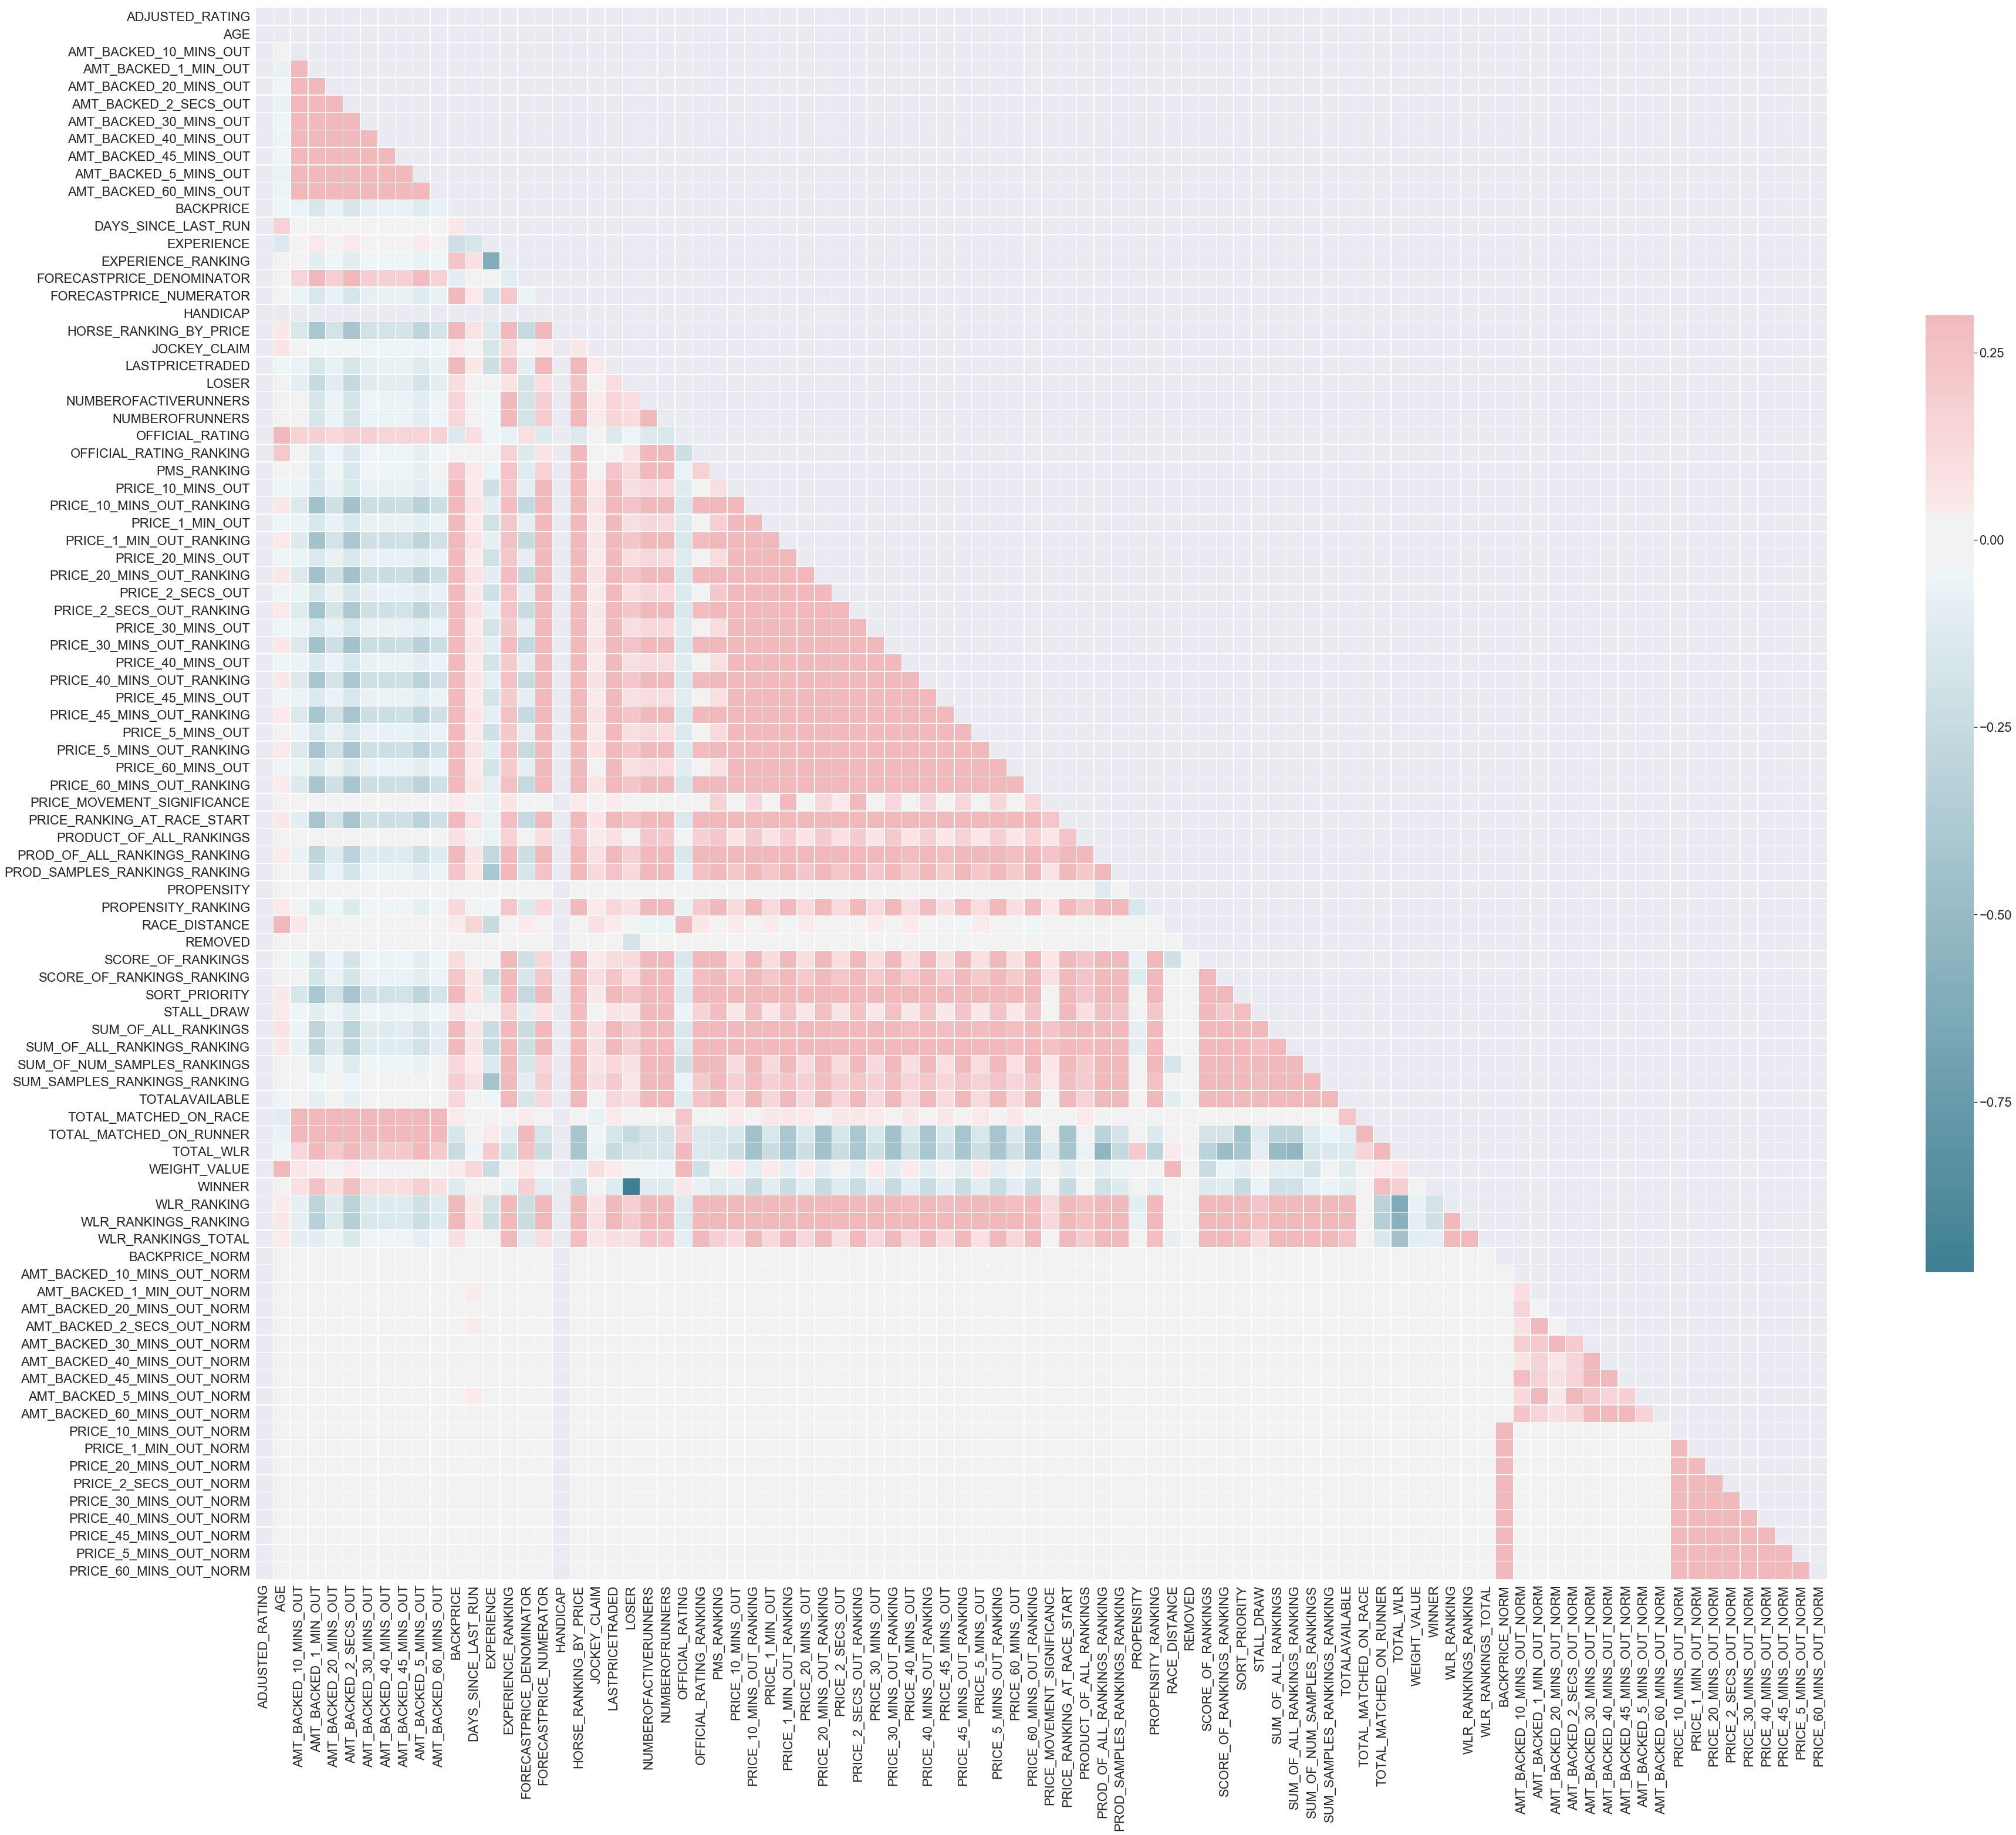

In [10]:
corr = df[cols].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(60, 60))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## This is a modified WINNER column to make it quicker to calculate Expected Value

In [130]:
df['WINNER_MOD'] = (df['WINNER'].astype(int)*2)-1

## This shows the 5 features that have the largest absolute correlation with WINNER

In [132]:
corrs = df[cols][df[cols].columns[1:]].corr()['WINNER'][:]
#corrs.sort_values(ascending=False)
corr_feat = abs(corrs).sort_values(ascending=False)
corr_feat[:7]

WINNER                       1.000000
LOSER                        0.977115
TOTAL_MATCHED_ON_RUNNER      0.270244
AMT_BACKED_2_SECS_OUT        0.267867
HORSE_RANKING_BY_PRICE       0.254800
AMT_BACKED_1_MIN_OUT         0.252296
PRICE_10_MINS_OUT_RANKING    0.251498
Name: WINNER, dtype: float64

## This section takes the top 10 features one at a time. It orders horses high to low and groups them into 8 equally sized bins. 

In [133]:
iles = 8
bin_size = len(df)/iles
batch_list = range(0,iles)

for i in range(2,12):
    feat = corr_feat.index[i]

    try:
        df = df.sort_values(by=[feat], ascending = False)
        df = df.reset_index()

        df['rank_' + feat] = df.index.values
        df['binned_' + feat] = pd.qcut(df['rank_' + feat],iles)
        
    except:
        df = df.drop(['level_0'], axis = 1)
        df = df.sort_values(by=[feat], ascending = False)
        df = df.reset_index()

        df['rank_' + feat] = df.index.values
        df['binned_' + feat] = pd.qcut(df['rank_' + feat],iles)

## This section analyses the expected value of some simple strategies. First choose a feature of interest below.

## First it plots the Win Probability of each bin. 
## It then plots the Expected Value if you were to bet on every horse in that bin.
## After that it looks at the EV of betting on a certain subset of those horses.

### Expected Value is calculated as the change per euro wagered to your a/c balance. +(-) X means you gain(lose) X€ for every 1€ wagered

In [151]:
corr_feat[2:12]

TOTAL_MATCHED_ON_RUNNER        0.270244
AMT_BACKED_2_SECS_OUT          0.267867
HORSE_RANKING_BY_PRICE         0.254800
AMT_BACKED_1_MIN_OUT           0.252296
PRICE_10_MINS_OUT_RANKING      0.251498
PRICE_RANKING_AT_RACE_START    0.251348
PRICE_20_MINS_OUT_RANKING      0.251223
PRICE_30_MINS_OUT_RANKING      0.249949
SORT_PRIORITY                  0.247024
PRICE_5_MINS_OUT_RANKING       0.239188
Name: WINNER, dtype: float64

In [273]:
feat = corr_feat.index[2]

prob_list = list(df.groupby('binned_' + feat).WINNER.sum()/bin_size)
bin_list = list(df.groupby('binned_' + feat).WINNER.sum().index)

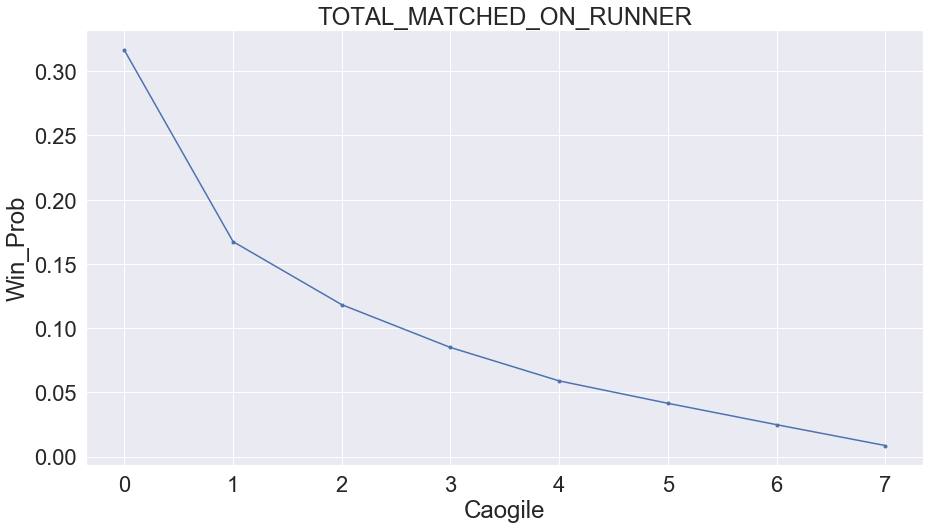

In [224]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, prob_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Win_Prob")
#_ = plt.plot([0, len(batch_list)], [1, 1])
plt.title(feat)

#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

In [241]:
df[(df['binned_' + feat] == bin_list[0])].TOTAL_MATCHED_ON_RUNNER.describe()

count    1.645800e+04
mean     1.954937e+05
std      1.678790e+05
min      8.307143e+04
25%      1.066443e+05
50%      1.464273e+05
75%      2.344421e+05
max      5.522757e+06
Name: TOTAL_MATCHED_ON_RUNNER, dtype: float64

## Here we select the horses with a BACKPRICE above a threshold. The threshold is a function of the 1/Win Probility for each bin. We show three increasingly stringent thresholds. 

## Finally the EV of each strategy is plotted versus the bins.

In [225]:
j_list0 = []
reward_list0 = []
EV_list0 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i])]
    for j in range(len(df1)):
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1)

        else:
            reward = -1


        reward_list0.append(reward)
    j_list0.append(np.sum(reward_list0))
    EV_list0.append(np.sum(reward_list0)/len(df1))

j_list1 = []
reward_list1 = []
EV_list1 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i]) & (df.BACKPRICE > 1/prob_list[i])]
    for j in range(len(df1)):
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1)

        else:
            reward = -1


        reward_list1.append(reward)
    j_list1.append(np.sum(reward_list1))
    EV_list1.append(np.sum(reward_list1)/len(df1))

j_list15 = []
reward_list15 = []
EV_list15 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i]) & (df.BACKPRICE > 1.5/prob_list[i])]
    for j in range(len(df1)):
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1)

        else:
            reward = -1


        reward_list15.append(reward)
    j_list15.append(np.sum(reward_list15))
    EV_list15.append(np.sum(reward_list15)/len(df1))

j_list2 = []
reward_list2 = []
EV_list2 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i]) & (df.BACKPRICE > 2/prob_list[i])]
    for j in range(len(df1)):
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1)

        else:
            reward = -1


        reward_list2.append(reward)
    j_list2.append(np.sum(reward_list2))
    EV_list2.append(np.sum(reward_list2)/len(df1))

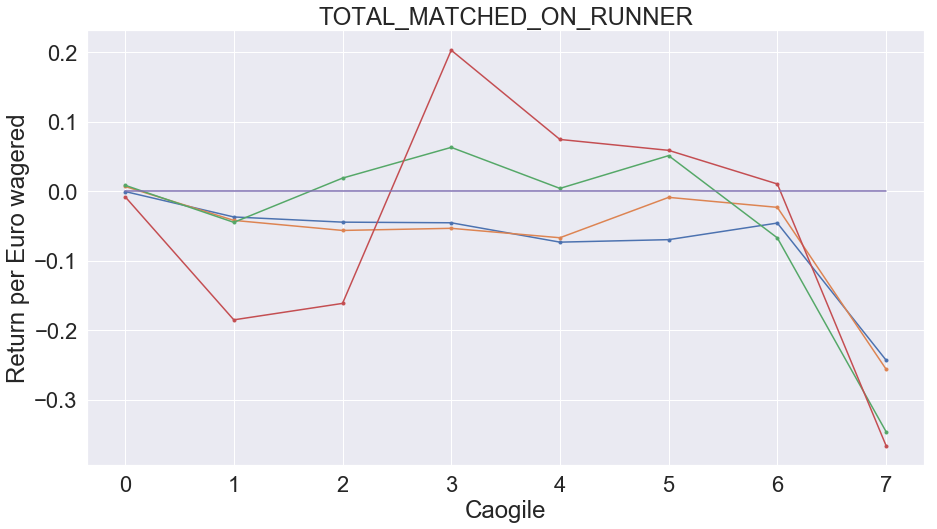

In [226]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, EV_list0, '.-')
ax.plot(batch_list, EV_list1, '.-')
ax.plot(batch_list, EV_list15, '.-')
ax.plot(batch_list, EV_list2, '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Return per Euro wagered")
_ = plt.plot([0, len(batch_list)-1], [0, 0])
plt.title(feat)

#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

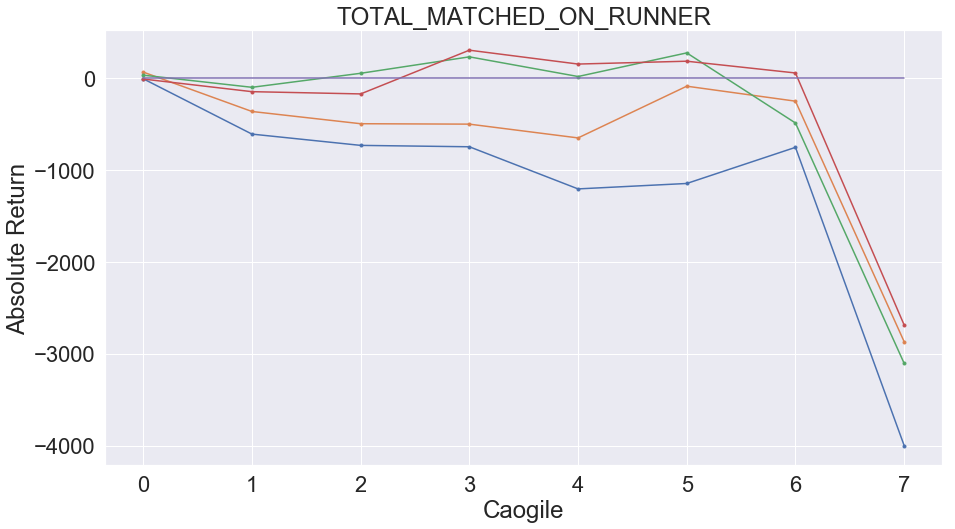

In [227]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, j_list0, '.-')
ax.plot(batch_list, j_list1, '.-')
ax.plot(batch_list, j_list15, '.-')
ax.plot(batch_list, j_list2, '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Absolute Return")
_ = plt.plot([0, len(batch_list)-1], [0, 0])
plt.title(feat)

#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

In [228]:
## should we adjust the backprice to account for the overround when calculating implied probabilities?

## We can do better if the size of our bet reflects the difference between the Win Probability implied by the price and the Win Probability given by the simple (single feature) model.
## Here we'll just use a linear relation, double the discrepancy => double the bet size.

In [229]:
j_list0 = []
reward_list0 = []
ret_per_bet0 = []
ret_per_eur0 = []
wager_list0 = []
wagers0 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i]) & (df.BACKPRICE > 0/prob_list[i])]
    for j in range(len(df1)):
        
        wager = (df1.iloc[j].BACKPRICE - (1/prob_list[i])) * 1
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1) * wager

        else:
            reward = -wager


        reward_list0.append(reward)
        wagers0.append(wager)
    wager_list0.append(np.sum(wagers0))
    j_list0.append(np.sum(reward_list0))
    ret_per_bet0.append(np.sum(reward_list0)/len(df1))
    ret_per_eur0.append(np.sum(reward_list0)/np.sum(wagers0))
    
    
    
    
j_list1 = []
reward_list1 = []
ret_per_bet1 = []
ret_per_eur1 = []
wager_list1 = []
wagers1 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i]) & (df.BACKPRICE > 1/prob_list[i])]
    for j in range(len(df1)):
        
        wager = (df1.iloc[j].BACKPRICE - (1/prob_list[i])) * 1
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1) * wager

        else:
            reward = -wager


        reward_list1.append(reward)
        wagers1.append(wager)
    wager_list1.append(np.sum(wagers1))
    j_list1.append(np.sum(reward_list1))
    ret_per_bet1.append(np.sum(reward_list1)/len(df1))
    ret_per_eur1.append(np.sum(reward_list1)/np.sum(wagers1))
    

    
j_list15 = []
reward_list15 = []
ret_per_bet15 = []
ret_per_eur15 = []
wager_list15 = []
wagers15 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i]) & (df.BACKPRICE > 1.5/prob_list[i])]
    for j in range(len(df1)):
        
        wager = (df1.iloc[j].BACKPRICE - (1.5/prob_list[i])) * 1
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1) * wager

        else:
            reward = -wager


        reward_list15.append(reward)
        wagers15.append(wager)
    wager_list15.append(np.sum(wagers15))
    j_list15.append(np.sum(reward_list15))
    ret_per_bet15.append(np.sum(reward_list15)/len(df1))
    ret_per_eur15.append(np.sum(reward_list15)/np.sum(wagers15))
    
    
    
    
j_list2 = []
reward_list2 = []
ret_per_bet2 = []
ret_per_eur2 = []
wager_list2 = []
wagers2 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i]) & (df.BACKPRICE > 2/prob_list[i])]
    for j in range(len(df1)):
        
        wager = (df1.iloc[j].BACKPRICE - (2/prob_list[i])) * 1
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1) * wager

        else:
            reward = -wager


        reward_list2.append(reward)
        wagers2.append(wager)
    wager_list2.append(np.sum(wagers2))
    j_list2.append(np.sum(reward_list2))
    ret_per_bet2.append(np.sum(reward_list2)/len(df1))
    ret_per_eur2.append(np.sum(reward_list2)/np.sum(wagers2))

## So we can see that we have had a positive impact on our Returns.

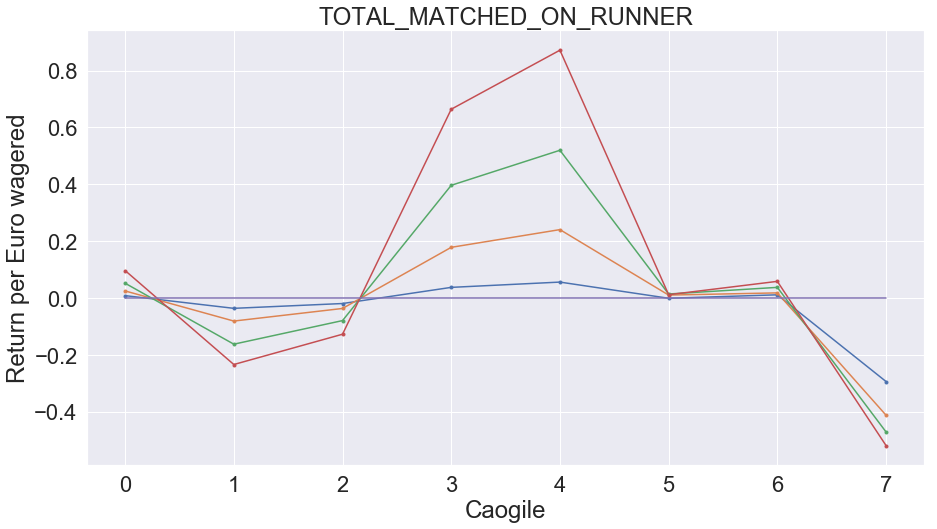

In [172]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, ret_per_eur0, '.-')
ax.plot(batch_list, ret_per_eur1, '.-')
ax.plot(batch_list, ret_per_eur15, '.-')
ax.plot(batch_list, ret_per_eur2, '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Return per Euro wagered")
_ = plt.plot([0, len(batch_list)-1], [0, 0])
plt.title(feat)

#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

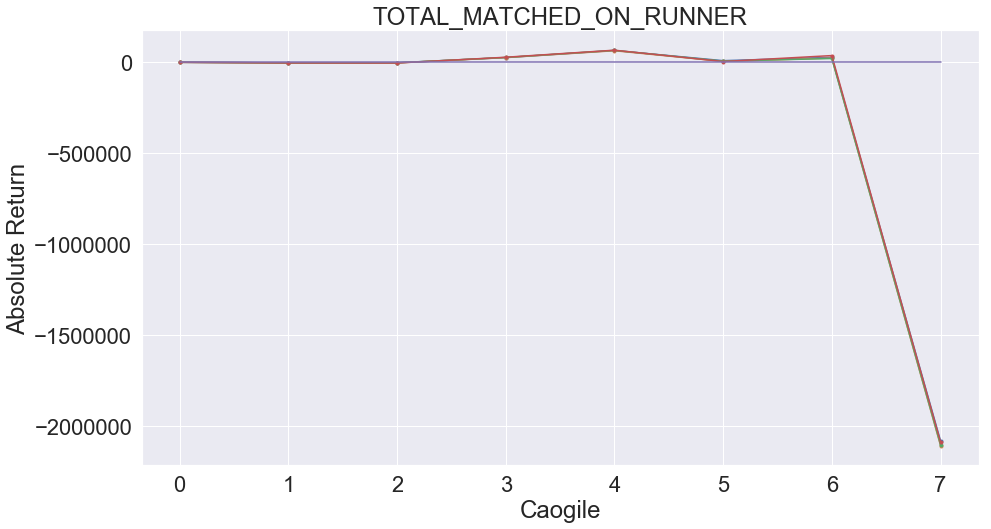

In [231]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, j_list0, '.-')
ax.plot(batch_list, j_list1, '.-')
ax.plot(batch_list, j_list15, '.-')
ax.plot(batch_list, j_list2, '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Absolute Return")
_ = plt.plot([0, len(batch_list)-1], [0, 0])
plt.title(feat)

#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

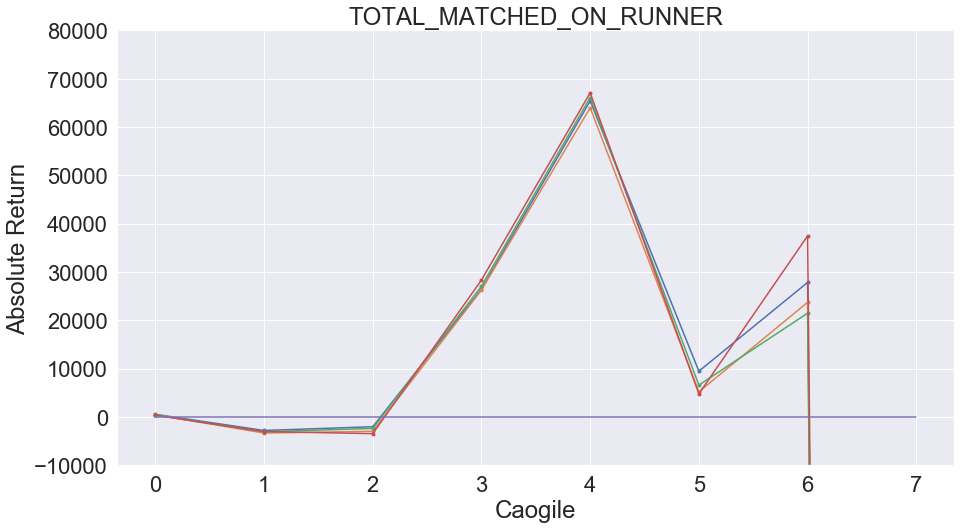

In [232]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, j_list0, '.-')
ax.plot(batch_list, j_list1, '.-')
ax.plot(batch_list, j_list15, '.-')
ax.plot(batch_list, j_list2, '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Absolute Return")
_ = plt.plot([0, len(batch_list)-1], [0, 0])
plt.title(feat)

#plt.xlim(-800,500)
plt.ylim(-10000,80000)

plt.grid(True)
plt.show()

## logarithmic funstion

In [188]:
j_list0 = []
reward_list0 = []
ret_per_bet0 = []
ret_per_eur0 = []
wager_list0 = []
wagers0 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i]) & (df.BACKPRICE > 0/prob_list[i])]
    for j in range(len(df1)):
        
        wager = np.log((df1.iloc[j].BACKPRICE - (1/prob_list[i])) * 1)
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1) * wager

        else:
            reward = -wager


        reward_list0.append(reward)
        wagers0.append(wager)
    wager_list0.append(np.sum(wagers0))
    j_list0.append(np.sum(reward_list0))
    ret_per_bet0.append(np.sum(reward_list0)/len(df1))
    ret_per_eur0.append(np.sum(reward_list0)/np.sum(wagers0))
    
    
    
    
j_list1 = []
reward_list1 = []
ret_per_bet1 = []
ret_per_eur1 = []
wager_list1 = []
wagers1 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i]) & (df.BACKPRICE > 1/prob_list[i])]
    for j in range(len(df1)):
        
        wager = np.log((df1.iloc[j].BACKPRICE - (1/prob_list[i])) * 1)
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1) * wager

        else:
            reward = -wager


        reward_list1.append(reward)
        wagers1.append(wager)
    wager_list1.append(np.sum(wagers1))
    j_list1.append(np.sum(reward_list1))
    ret_per_bet1.append(np.sum(reward_list1)/len(df1))
    ret_per_eur1.append(np.sum(reward_list1)/np.sum(wagers1))
    

    
j_list15 = []
reward_list15 = []
ret_per_bet15 = []
ret_per_eur15 = []
wager_list15 = []
wagers15 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i]) & (df.BACKPRICE > 1.5/prob_list[i])]
    for j in range(len(df1)):
        
        wager = np.log((df1.iloc[j].BACKPRICE - (1.5/prob_list[i])) * 1)
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1) * wager

        else:
            reward = -wager


        reward_list15.append(reward)
        wagers15.append(wager)
    wager_list15.append(np.sum(wagers15))
    j_list15.append(np.sum(reward_list15))
    ret_per_bet15.append(np.sum(reward_list15)/len(df1))
    ret_per_eur15.append(np.sum(reward_list15)/np.sum(wagers15))
    
    
    
    
j_list2 = []
reward_list2 = []
ret_per_bet2 = []
ret_per_eur2 = []
wager_list2 = []
wagers2 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i]) & (df.BACKPRICE > 2/prob_list[i])]
    for j in range(len(df1)):
        
        wager = np.log((df1.iloc[j].BACKPRICE - (2/prob_list[i])) * 1)
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1) * wager

        else:
            reward = -wager


        reward_list2.append(reward)
        wagers2.append(wager)
    wager_list2.append(np.sum(wagers2))
    j_list2.append(np.sum(reward_list2))
    ret_per_bet2.append(np.sum(reward_list2)/len(df1))
    ret_per_eur2.append(np.sum(reward_list2)/np.sum(wagers2))

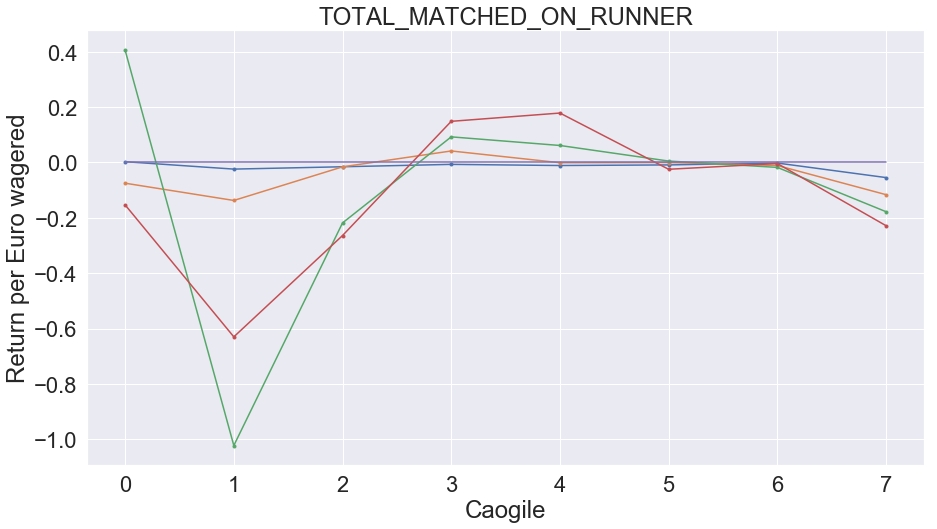

In [189]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, ret_per_eur0, '.-')
ax.plot(batch_list, ret_per_eur1, '.-')
ax.plot(batch_list, ret_per_eur15, '.-')
ax.plot(batch_list, ret_per_eur2, '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Return per Euro wagered")
_ = plt.plot([0, len(batch_list)-1], [0, 0])
plt.title(feat)

#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

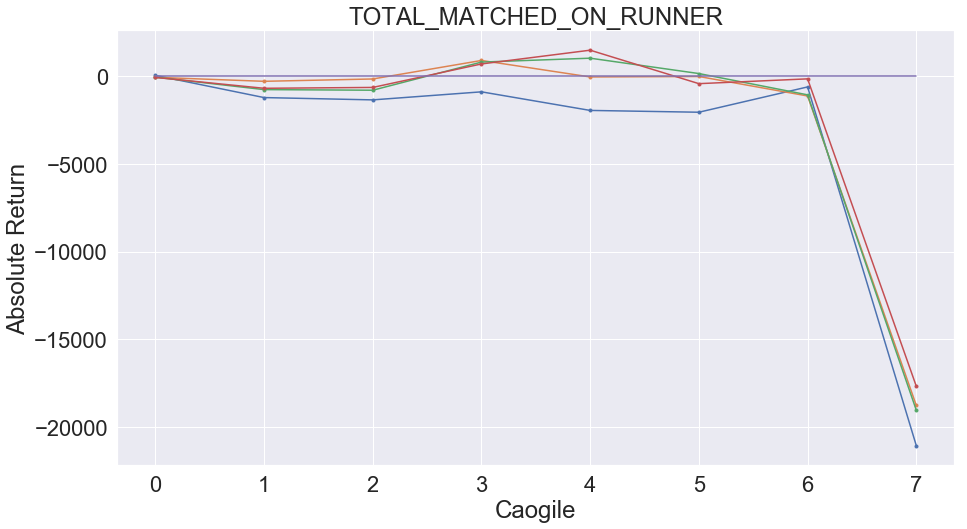

In [190]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, j_list0, '.-')
ax.plot(batch_list, j_list1, '.-')
ax.plot(batch_list, j_list15, '.-')
ax.plot(batch_list, j_list2, '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Absolute Return")
_ = plt.plot([0, len(batch_list)-1], [0, 0])
plt.title(feat)

#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

## Square function

In [191]:
j_list0 = []
reward_list0 = []
ret_per_bet0 = []
ret_per_eur0 = []
wager_list0 = []
wagers0 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i]) & (df.BACKPRICE > 0/prob_list[i])]
    for j in range(len(df1)):
        
        wager = ((df1.iloc[j].BACKPRICE - (1/prob_list[i])) * 1)**1.5
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1) * wager

        else:
            reward = -wager


        reward_list0.append(reward)
        wagers0.append(wager)
    wager_list0.append(np.sum(wagers0))
    j_list0.append(np.sum(reward_list0))
    ret_per_bet0.append(np.sum(reward_list0)/len(df1))
    ret_per_eur0.append(np.sum(reward_list0)/np.sum(wagers0))
    
    
    
    
j_list1 = []
reward_list1 = []
ret_per_bet1 = []
ret_per_eur1 = []
wager_list1 = []
wagers1 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i]) & (df.BACKPRICE > 1/prob_list[i])]
    for j in range(len(df1)):
        
        wager = ((df1.iloc[j].BACKPRICE - (1/prob_list[i])) * 1)**1.5
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1) * wager

        else:
            reward = -wager


        reward_list1.append(reward)
        wagers1.append(wager)
    wager_list1.append(np.sum(wagers1))
    j_list1.append(np.sum(reward_list1))
    ret_per_bet1.append(np.sum(reward_list1)/len(df1))
    ret_per_eur1.append(np.sum(reward_list1)/np.sum(wagers1))
    

    
j_list15 = []
reward_list15 = []
ret_per_bet15 = []
ret_per_eur15 = []
wager_list15 = []
wagers15 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i]) & (df.BACKPRICE > 1.5/prob_list[i])]
    for j in range(len(df1)):
        
        wager = ((df1.iloc[j].BACKPRICE - (1.5/prob_list[i])) * 1)**1.5
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1) * wager

        else:
            reward = -wager


        reward_list15.append(reward)
        wagers15.append(wager)
    wager_list15.append(np.sum(wagers15))
    j_list15.append(np.sum(reward_list15))
    ret_per_bet15.append(np.sum(reward_list15)/len(df1))
    ret_per_eur15.append(np.sum(reward_list15)/np.sum(wagers15))
    
    
    
    
j_list2 = []
reward_list2 = []
ret_per_bet2 = []
ret_per_eur2 = []
wager_list2 = []
wagers2 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i]) & (df.BACKPRICE > 2/prob_list[i])]
    for j in range(len(df1)):
        
        wager = ((df1.iloc[j].BACKPRICE - (2/prob_list[i])) * 1)**1.5
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1) * wager

        else:
            reward = -wager


        reward_list2.append(reward)
        wagers2.append(wager)
    wager_list2.append(np.sum(wagers2))
    j_list2.append(np.sum(reward_list2))
    ret_per_bet2.append(np.sum(reward_list2)/len(df1))
    ret_per_eur2.append(np.sum(reward_list2)/np.sum(wagers2))

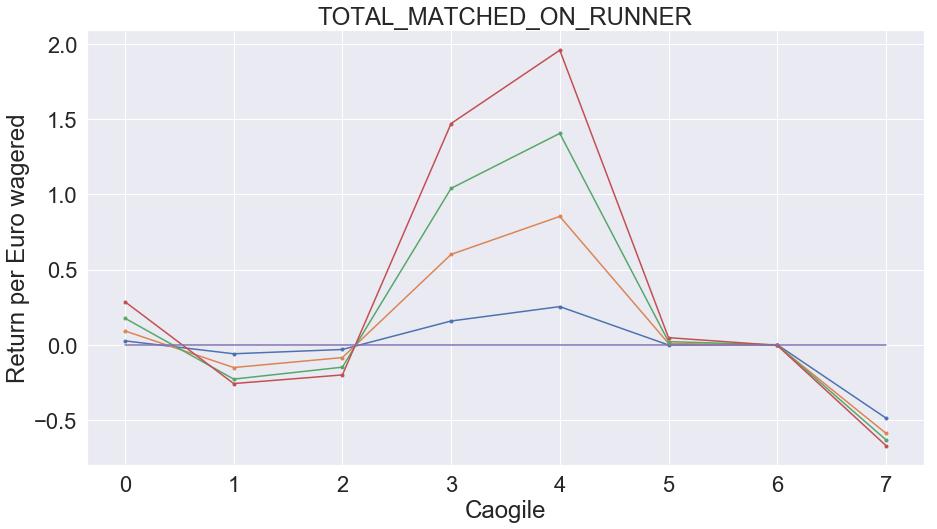

In [192]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, ret_per_eur0, '.-')
ax.plot(batch_list, ret_per_eur1, '.-')
ax.plot(batch_list, ret_per_eur15, '.-')
ax.plot(batch_list, ret_per_eur2, '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Return per Euro wagered")
_ = plt.plot([0, len(batch_list)-1], [0, 0])
plt.title(feat)

#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

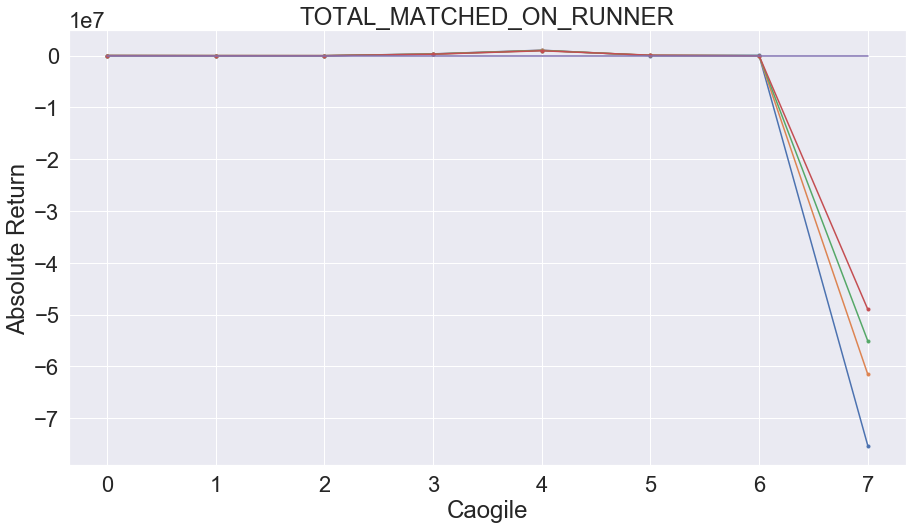

In [193]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, j_list0, '.-')
ax.plot(batch_list, j_list1, '.-')
ax.plot(batch_list, j_list15, '.-')
ax.plot(batch_list, j_list2, '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Absolute Return")
_ = plt.plot([0, len(batch_list)-1], [0, 0])
plt.title(feat)

#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

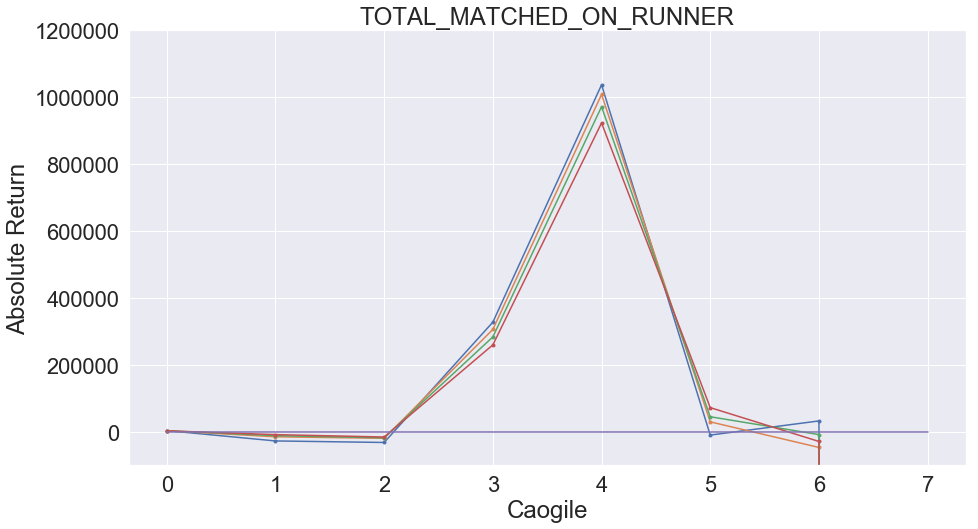

In [197]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, j_list0, '.-')
ax.plot(batch_list, j_list1, '.-')
ax.plot(batch_list, j_list15, '.-')
ax.plot(batch_list, j_list2, '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Absolute Return")
_ = plt.plot([0, len(batch_list)-1], [0, 0])
plt.title(feat)

#plt.xlim(-800,500)
plt.ylim(-100000,1200000)

plt.grid(True)
plt.show()

## Changing the feature to Horse RAnking by Price. This is for the complete noob, just looks at the board and wants to limit his losses while having the craic.

In [233]:
feat = corr_feat.index[4]

In [202]:
prob_list = list(df.groupby('binned_' + feat).WINNER.sum()/bin_size)
bin_list = list(df.groupby('binned_' + feat).WINNER.sum().index)

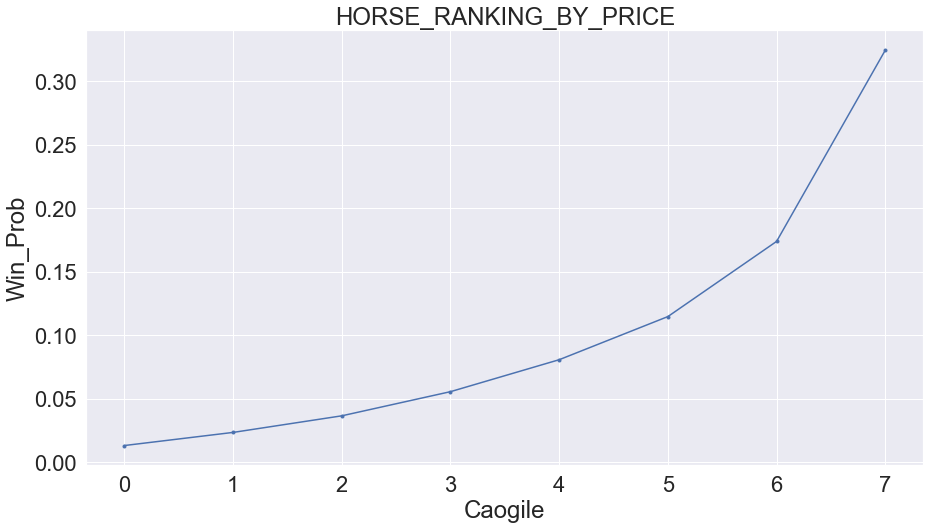

In [203]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, prob_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Win_Prob")
#_ = plt.plot([0, len(batch_list)], [1, 1])
plt.title(feat)

#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

In [239]:
df[(df['binned_' + feat] == bin_list[5])].HORSE_RANKING_BY_PRICE.describe()

count    16457.000000
mean         3.538190
std          0.498555
min          3.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          4.000000
Name: HORSE_RANKING_BY_PRICE, dtype: float64

## Here we select the horses with a BACKPRICE above a threshold. The threshold is a function of the 1/Win Probility for each bin. We show three increasingly stringent thresholds. 

## Finally the EV of each strategy is plotted versus the bins.

In [204]:
j_list0 = []
reward_list0 = []
EV_list0 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i])]
    for j in range(len(df1)):
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1)

        else:
            reward = -1


        reward_list0.append(reward)
    j_list0.append(np.sum(reward_list0))
    EV_list0.append(np.sum(reward_list0)/len(df1))

j_list1 = []
reward_list1 = []
EV_list1 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i]) & (df.BACKPRICE > 1/prob_list[i])]
    for j in range(len(df1)):
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1)

        else:
            reward = -1


        reward_list1.append(reward)
    j_list1.append(np.sum(reward_list1))
    EV_list1.append(np.sum(reward_list1)/len(df1))

j_list15 = []
reward_list15 = []
EV_list15 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i]) & (df.BACKPRICE > 1.5/prob_list[i])]
    for j in range(len(df1)):
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1)

        else:
            reward = -1


        reward_list15.append(reward)
    j_list15.append(np.sum(reward_list15))
    EV_list15.append(np.sum(reward_list15)/len(df1))

j_list2 = []
reward_list2 = []
EV_list2 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i]) & (df.BACKPRICE > 2/prob_list[i])]
    for j in range(len(df1)):
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1)

        else:
            reward = -1


        reward_list2.append(reward)
    j_list2.append(np.sum(reward_list2))
    EV_list2.append(np.sum(reward_list2)/len(df1))

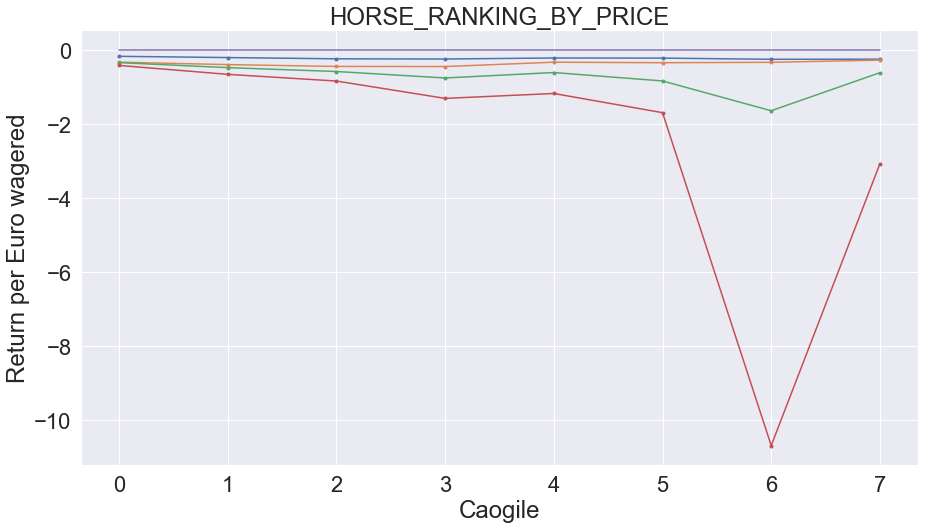

In [205]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, EV_list0, '.-')
ax.plot(batch_list, EV_list1, '.-')
ax.plot(batch_list, EV_list15, '.-')
ax.plot(batch_list, EV_list2, '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Return per Euro wagered")
_ = plt.plot([0, len(batch_list)-1], [0, 0])
plt.title(feat)

#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

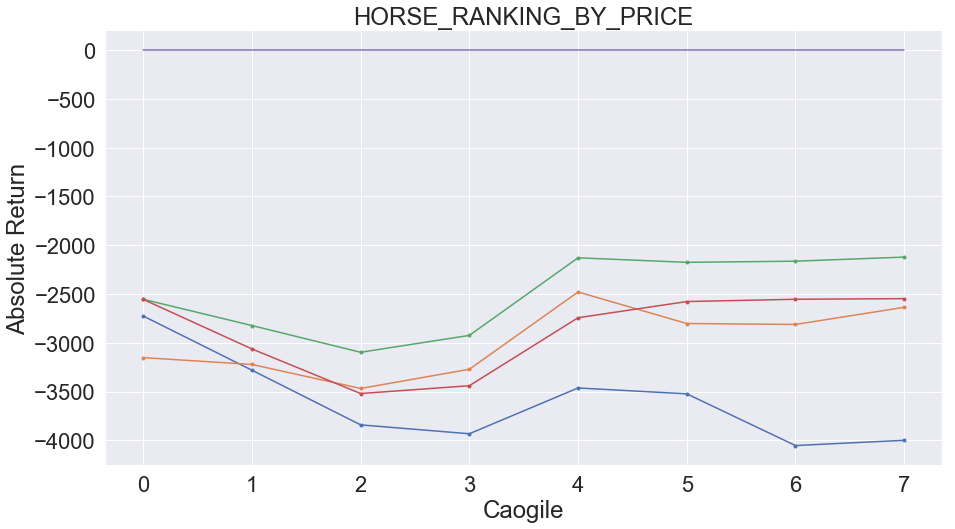

In [206]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, j_list0, '.-')
ax.plot(batch_list, j_list1, '.-')
ax.plot(batch_list, j_list15, '.-')
ax.plot(batch_list, j_list2, '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Absolute Return")
_ = plt.plot([0, len(batch_list)-1], [0, 0])
plt.title(feat)

#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

In [207]:
## should we adjust the backprice to account for the overround when calculating implied probabilities?

## We can do better if the size of our bet reflects the difference between the Win Probability implied by the price and the Win Probability given by the simple (single feature) model.
## Here we'll just use a linear relation, double the discrepancy => double the bet size.

In [208]:
j_list0 = []
reward_list0 = []
ret_per_bet0 = []
ret_per_eur0 = []
wager_list0 = []
wagers0 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i]) & (df.BACKPRICE > 0/prob_list[i])]
    for j in range(len(df1)):
        
        wager = (df1.iloc[j].BACKPRICE - (1/prob_list[i])) * 1
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1) * wager

        else:
            reward = -wager


        reward_list0.append(reward)
        wagers0.append(wager)
    wager_list0.append(np.sum(wagers0))
    j_list0.append(np.sum(reward_list0))
    ret_per_bet0.append(np.sum(reward_list0)/len(df1))
    ret_per_eur0.append(np.sum(reward_list0)/np.sum(wagers0))
    
    
    
    
j_list1 = []
reward_list1 = []
ret_per_bet1 = []
ret_per_eur1 = []
wager_list1 = []
wagers1 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i]) & (df.BACKPRICE > 1/prob_list[i])]
    for j in range(len(df1)):
        
        wager = (df1.iloc[j].BACKPRICE - (1/prob_list[i])) * 1
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1) * wager

        else:
            reward = -wager


        reward_list1.append(reward)
        wagers1.append(wager)
    wager_list1.append(np.sum(wagers1))
    j_list1.append(np.sum(reward_list1))
    ret_per_bet1.append(np.sum(reward_list1)/len(df1))
    ret_per_eur1.append(np.sum(reward_list1)/np.sum(wagers1))
    

    
j_list15 = []
reward_list15 = []
ret_per_bet15 = []
ret_per_eur15 = []
wager_list15 = []
wagers15 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i]) & (df.BACKPRICE > 1.5/prob_list[i])]
    for j in range(len(df1)):
        
        wager = (df1.iloc[j].BACKPRICE - (1.5/prob_list[i])) * 1
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1) * wager

        else:
            reward = -wager


        reward_list15.append(reward)
        wagers15.append(wager)
    wager_list15.append(np.sum(wagers15))
    j_list15.append(np.sum(reward_list15))
    ret_per_bet15.append(np.sum(reward_list15)/len(df1))
    ret_per_eur15.append(np.sum(reward_list15)/np.sum(wagers15))
    
    
    
    
j_list2 = []
reward_list2 = []
ret_per_bet2 = []
ret_per_eur2 = []
wager_list2 = []
wagers2 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i]) & (df.BACKPRICE > 2/prob_list[i])]
    for j in range(len(df1)):
        
        wager = (df1.iloc[j].BACKPRICE - (2/prob_list[i])) * 1
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1) * wager

        else:
            reward = -wager


        reward_list2.append(reward)
        wagers2.append(wager)
    wager_list2.append(np.sum(wagers2))
    j_list2.append(np.sum(reward_list2))
    ret_per_bet2.append(np.sum(reward_list2)/len(df1))
    ret_per_eur2.append(np.sum(reward_list2)/np.sum(wagers2))

## So we can see that we have had a positive impact on our Returns.

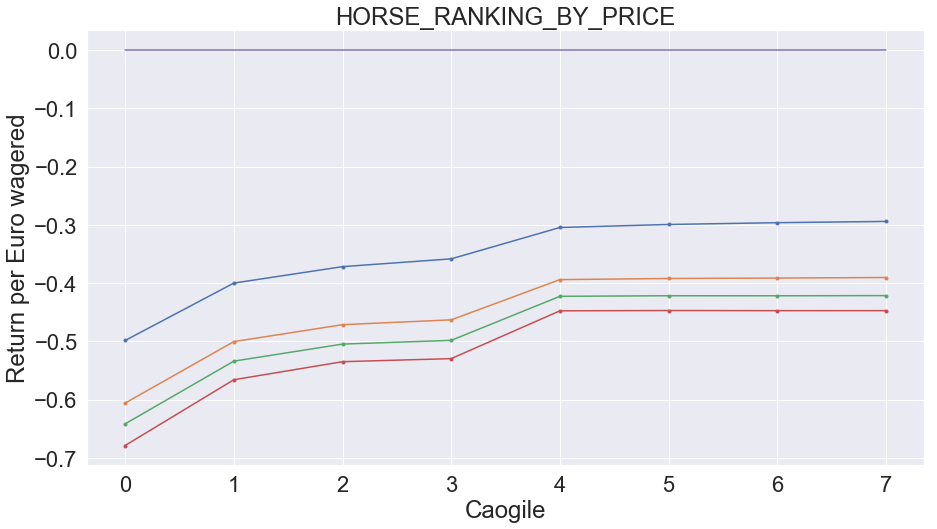

In [209]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, ret_per_eur0, '.-')
ax.plot(batch_list, ret_per_eur1, '.-')
ax.plot(batch_list, ret_per_eur15, '.-')
ax.plot(batch_list, ret_per_eur2, '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Return per Euro wagered")
_ = plt.plot([0, len(batch_list)-1], [0, 0])
plt.title(feat)

#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

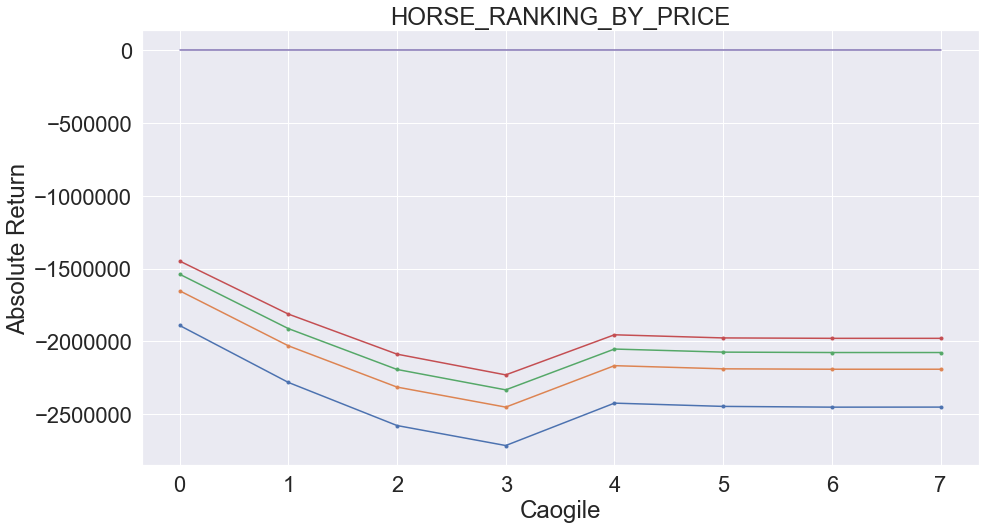

In [210]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, j_list0, '.-')
ax.plot(batch_list, j_list1, '.-')
ax.plot(batch_list, j_list15, '.-')
ax.plot(batch_list, j_list2, '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Absolute Return")
_ = plt.plot([0, len(batch_list)-1], [0, 0])
plt.title(feat)

#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

## logarithmic funstion

In [212]:
j_list0 = []
reward_list0 = []
ret_per_bet0 = []
ret_per_eur0 = []
wager_list0 = []
wagers0 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i]) & (df.BACKPRICE > 0/prob_list[i])]
    for j in range(len(df1)):
        
        wager = np.log((df1.iloc[j].BACKPRICE - (1/prob_list[i])) * 1)
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1) * wager

        else:
            reward = -wager


        reward_list0.append(reward)
        wagers0.append(wager)
    wager_list0.append(np.sum(wagers0))
    j_list0.append(np.sum(reward_list0))
    ret_per_bet0.append(np.sum(reward_list0)/len(df1))
    ret_per_eur0.append(np.sum(reward_list0)/np.sum(wagers0))
    
    
    
    
j_list1 = []
reward_list1 = []
ret_per_bet1 = []
ret_per_eur1 = []
wager_list1 = []
wagers1 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i]) & (df.BACKPRICE > 1/prob_list[i])]
    for j in range(len(df1)):
        
        wager = np.log((df1.iloc[j].BACKPRICE - (1/prob_list[i])) * 1)
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1) * wager

        else:
            reward = -wager


        reward_list1.append(reward)
        wagers1.append(wager)
    wager_list1.append(np.sum(wagers1))
    j_list1.append(np.sum(reward_list1))
    ret_per_bet1.append(np.sum(reward_list1)/len(df1))
    ret_per_eur1.append(np.sum(reward_list1)/np.sum(wagers1))
    

    
j_list15 = []
reward_list15 = []
ret_per_bet15 = []
ret_per_eur15 = []
wager_list15 = []
wagers15 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i]) & (df.BACKPRICE > 1.5/prob_list[i])]
    for j in range(len(df1)):
        
        wager = np.log((df1.iloc[j].BACKPRICE - (1.5/prob_list[i])) * 1)
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1) * wager

        else:
            reward = -wager


        reward_list15.append(reward)
        wagers15.append(wager)
    wager_list15.append(np.sum(wagers15))
    j_list15.append(np.sum(reward_list15))
    ret_per_bet15.append(np.sum(reward_list15)/len(df1))
    ret_per_eur15.append(np.sum(reward_list15)/np.sum(wagers15))
    
    
    
    
j_list2 = []
reward_list2 = []
ret_per_bet2 = []
ret_per_eur2 = []
wager_list2 = []
wagers2 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i]) & (df.BACKPRICE > 2/prob_list[i])]
    for j in range(len(df1)):
        
        wager = np.log((df1.iloc[j].BACKPRICE - (2/prob_list[i])) * 1)
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1) * wager

        else:
            reward = -wager


        reward_list2.append(reward)
        wagers2.append(wager)
    wager_list2.append(np.sum(wagers2))
    j_list2.append(np.sum(reward_list2))
    ret_per_bet2.append(np.sum(reward_list2)/len(df1))
    ret_per_eur2.append(np.sum(reward_list2)/np.sum(wagers2))

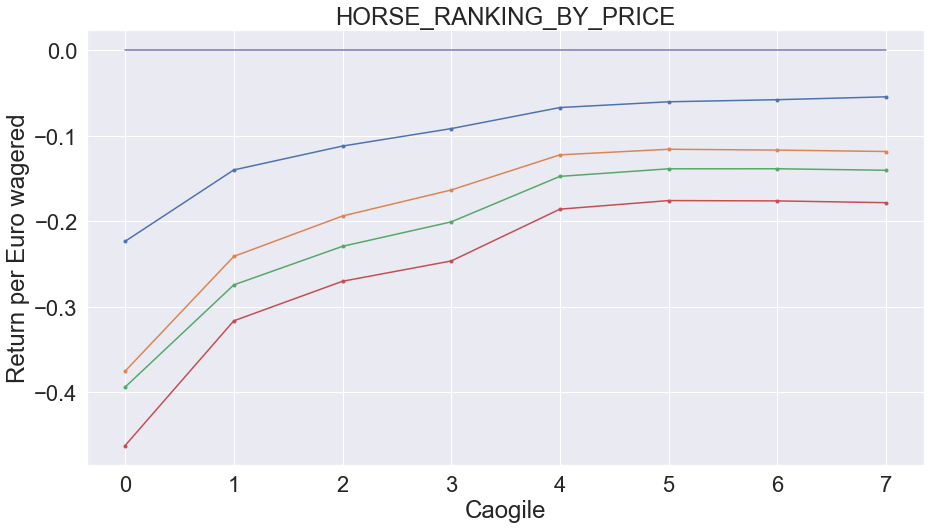

In [213]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, ret_per_eur0, '.-')
ax.plot(batch_list, ret_per_eur1, '.-')
ax.plot(batch_list, ret_per_eur15, '.-')
ax.plot(batch_list, ret_per_eur2, '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Return per Euro wagered")
_ = plt.plot([0, len(batch_list)-1], [0, 0])
plt.title(feat)

#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

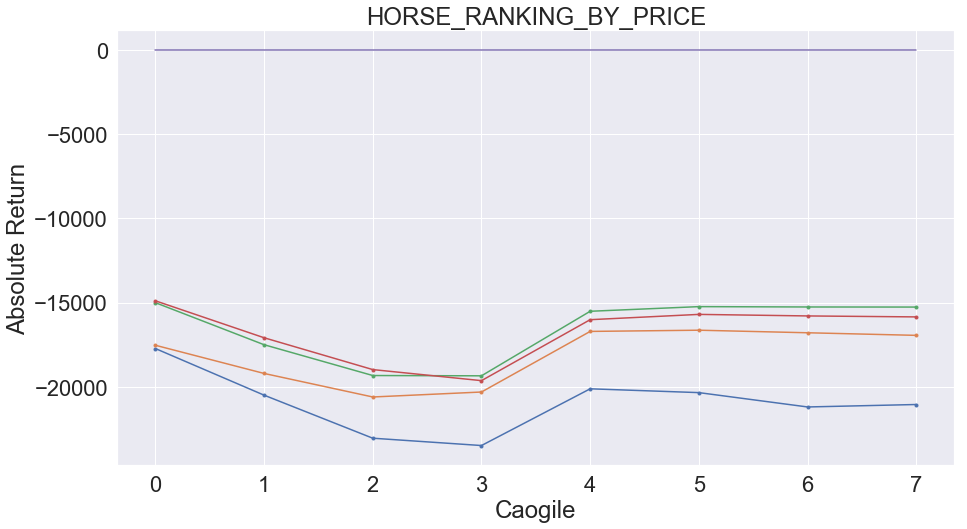

In [214]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, j_list0, '.-')
ax.plot(batch_list, j_list1, '.-')
ax.plot(batch_list, j_list15, '.-')
ax.plot(batch_list, j_list2, '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Absolute Return")
_ = plt.plot([0, len(batch_list)-1], [0, 0])
plt.title(feat)

#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

## Square function

In [219]:
j_list0 = []
reward_list0 = []
ret_per_bet0 = []
ret_per_eur0 = []
wager_list0 = []
wagers0 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i]) & (df.BACKPRICE > 0/prob_list[i])]
    for j in range(len(df1)):
        
        wager = ((df1.iloc[j].BACKPRICE - (1/prob_list[i])) * 1)**1.5
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1) * wager

        else:
            reward = -wager


        reward_list0.append(reward)
        wagers0.append(wager)
    wager_list0.append(np.sum(wagers0))
    j_list0.append(np.sum(reward_list0))
    ret_per_bet0.append(np.sum(reward_list0)/len(df1))
    ret_per_eur0.append(np.sum(reward_list0)/np.sum(wagers0))
    
    
    
    
j_list1 = []
reward_list1 = []
ret_per_bet1 = []
ret_per_eur1 = []
wager_list1 = []
wagers1 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i]) & (df.BACKPRICE > 1/prob_list[i])]
    for j in range(len(df1)):
        
        wager = ((df1.iloc[j].BACKPRICE - (1/prob_list[i])) * 1)**1.5
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1) * wager

        else:
            reward = -wager


        reward_list1.append(reward)
        wagers1.append(wager)
    wager_list1.append(np.sum(wagers1))
    j_list1.append(np.sum(reward_list1))
    ret_per_bet1.append(np.sum(reward_list1)/len(df1))
    ret_per_eur1.append(np.sum(reward_list1)/np.sum(wagers1))
    

    
j_list15 = []
reward_list15 = []
ret_per_bet15 = []
ret_per_eur15 = []
wager_list15 = []
wagers15 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i]) & (df.BACKPRICE > 1.5/prob_list[i])]
    for j in range(len(df1)):
        
        wager = ((df1.iloc[j].BACKPRICE - (1.5/prob_list[i])) * 1)**1.5
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1) * wager

        else:
            reward = -wager


        reward_list15.append(reward)
        wagers15.append(wager)
    wager_list15.append(np.sum(wagers15))
    j_list15.append(np.sum(reward_list15))
    ret_per_bet15.append(np.sum(reward_list15)/len(df1))
    ret_per_eur15.append(np.sum(reward_list15)/np.sum(wagers15))
    
    
    
    
j_list2 = []
reward_list2 = []
ret_per_bet2 = []
ret_per_eur2 = []
wager_list2 = []
wagers2 = []

for i in range(8):
    df1 = df[(df['binned_' + feat] == bin_list[i]) & (df.BACKPRICE > 2/prob_list[i])]
    for j in range(len(df1)):
        
        wager = ((df1.iloc[j].BACKPRICE - (2/prob_list[i])) * 1)**1.5
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1) * wager

        else:
            reward = -wager


        reward_list2.append(reward)
        wagers2.append(wager)
    wager_list2.append(np.sum(wagers2))
    j_list2.append(np.sum(reward_list2))
    ret_per_bet2.append(np.sum(reward_list2)/len(df1))
    ret_per_eur2.append(np.sum(reward_list2)/np.sum(wagers2))

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


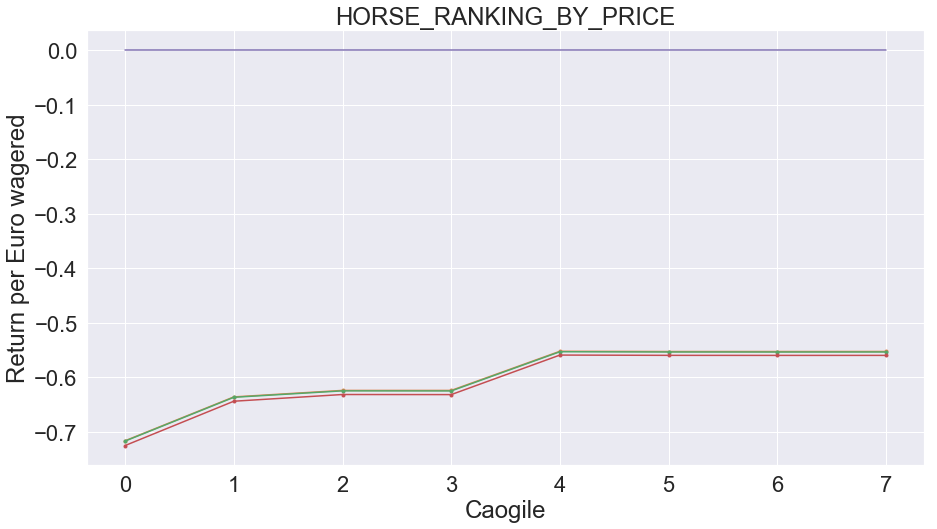

In [220]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, ret_per_eur0, '.-')
ax.plot(batch_list, ret_per_eur1, '.-')
ax.plot(batch_list, ret_per_eur15, '.-')
ax.plot(batch_list, ret_per_eur2, '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Return per Euro wagered")
_ = plt.plot([0, len(batch_list)-1], [0, 0])
plt.title(feat)

#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

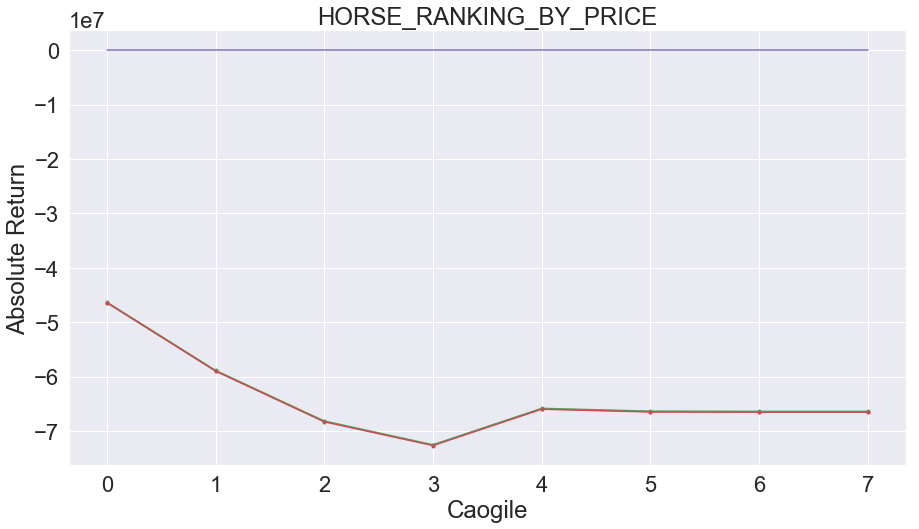

In [221]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, j_list0, '.-')
ax.plot(batch_list, j_list1, '.-')
ax.plot(batch_list, j_list15, '.-')
ax.plot(batch_list, j_list2, '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Absolute Return")
_ = plt.plot([0, len(batch_list)-1], [0, 0])
plt.title(feat)

#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

In [257]:
bin_list_1 = list(df.groupby('binned_AMT_BACKED_2_SECS_OUT').WINNER.sum().index)
bin_list_2 = list(df.groupby('binned_HORSE_RANKING_BY_PRICE').WINNER.sum().index)

In [144]:
count_list = []
j_list = []
for j in range(len(bin_list_1)):
    for k in range(len(bin_list_2)):
        df1 = df[(df.binned_AMT_BACKED_2_SECS_OUT ==  bin_list_1[j]) & (df.binned_HORSE_RANKING_BY_PRICE ==  bin_list_2[k])]
        count_list.append(len(df1))
        gain = np.sum(df1.WINNER * (df1.BACKPRICE)-1)
        loss = df1.LOSER.sum()
        reward = gain - loss
        j_list.append(reward)

In [145]:
data = np.asarray(j_list).reshape((iles,iles))
data_count = np.asarray(count_list).reshape((iles,iles))

#data = np.log10(data)
#data_count = np.log10(data_count)

In [146]:
#j_list.sort()
#j_list

In [147]:
#sns.set(font_scale=4)
sns.set(rc={'figure.figsize':(15,8.27)})

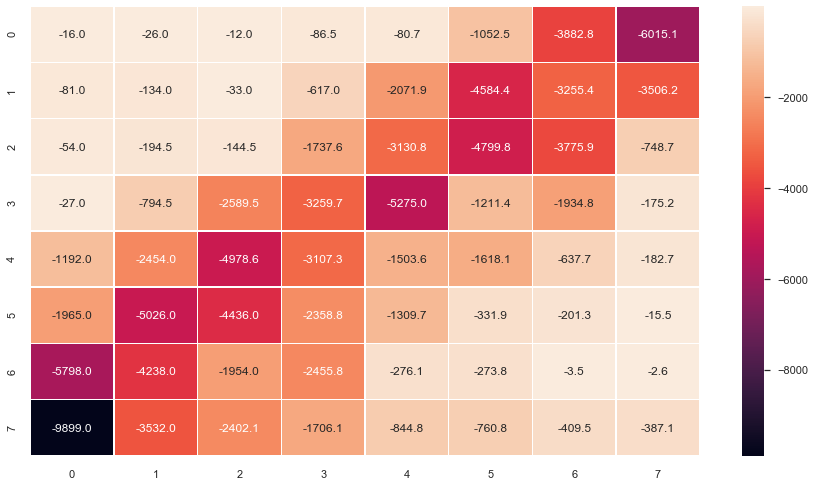

In [148]:
ax = sns.heatmap(data, linewidth=0.5, annot = True, fmt = '.1f')
plt.show()

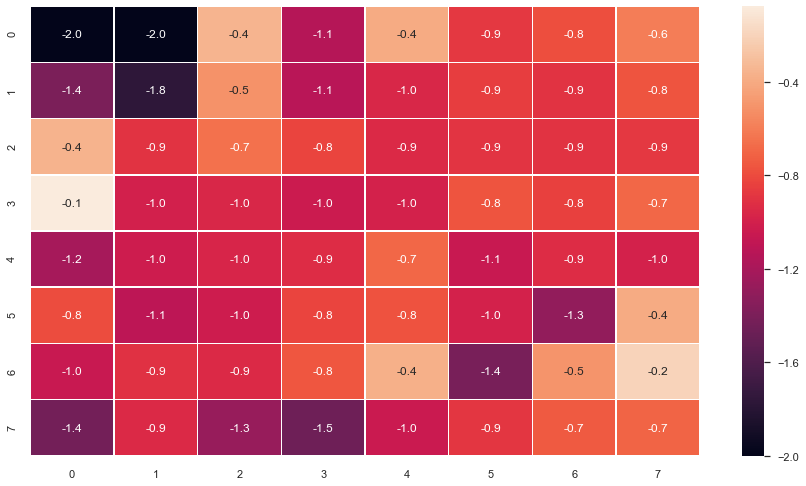

In [149]:
ax = sns.heatmap(data/data_count, linewidth=0.5, annot = True, fmt = '.1f')
plt.show()

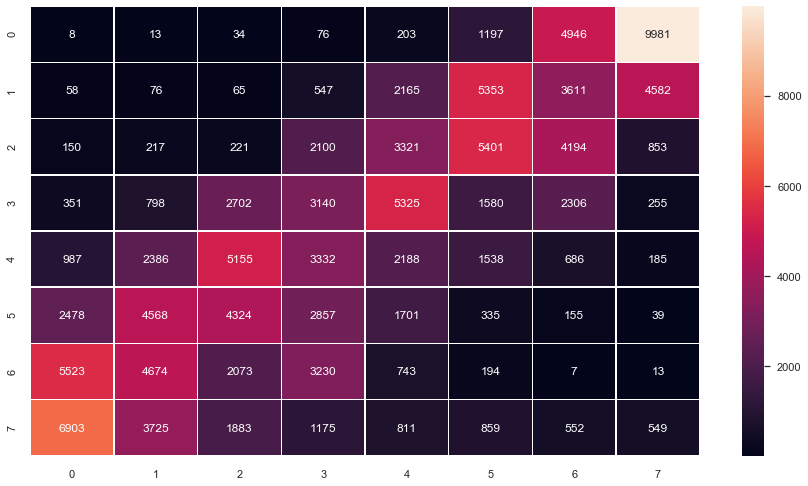

In [150]:
ax = sns.heatmap(data_count, linewidth=0.5, annot = True, fmt = 'd')
plt.show()

## y_axis is bin_list_1
## x_axis is bin_list_2

C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


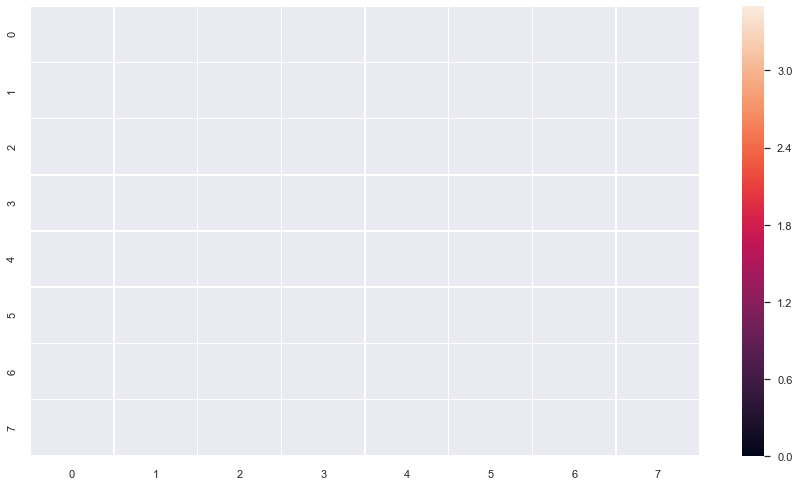

In [23]:
axs = sns.heatmap(np.log10(data), linewidth=0.5, vmin=0, vmax=3.5,annot = True, fmt = '.2f')
plt.show()

In [32]:
count_list = []
j_list = []
for j in range(len(bin_list_1)):
    for k in range(len(bin_list_2)):
        df1 = df[(df.binned_AMT_BACKED_2_SECS_OUT ==  bin_list_1[j]) & (df.binned_HORSE_RANKING_BY_PRICE ==  bin_list_2[k])]
        count_list.append(len(df1))
        reward_list = []

        for i in range(500):
            try:
                rand = randrange(len(df1))
                if (df1.iloc[rand].WINNER) == 1:
                    reward = (df1.iloc[rand].BACKPRICE-1)
                    
                else:
                    reward = -1
                    
            except:
                reward = 0
                
            reward_list.append(reward)

        j_list.append(np.sum(reward_list))

In [33]:
data = np.asarray(j_list).reshape((iles,iles))
data_count = np.asarray(count_list).reshape((iles,iles))

#data = np.log10(data)
#data_count = np.log10(data_count)

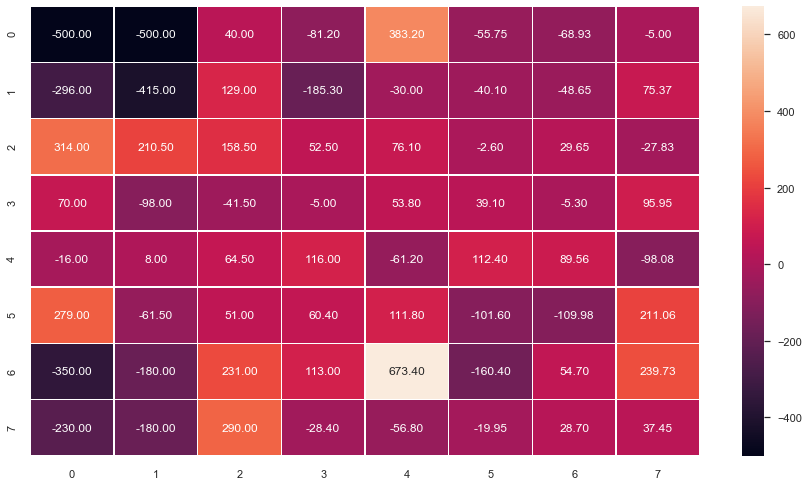

In [34]:
ax = sns.heatmap(data, linewidth=0.5,annot = True, fmt = '.2f')
plt.show()

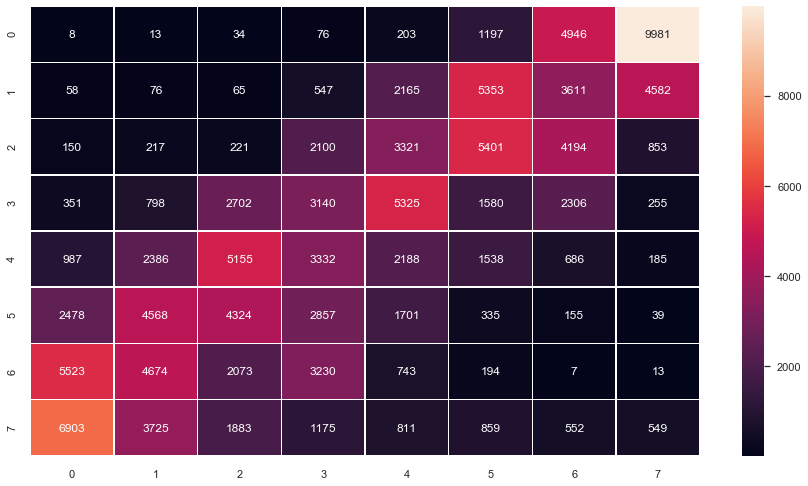

In [35]:
ax = sns.heatmap(data_count, linewidth=0.5,annot = True, fmt = 'd')
plt.show()

## y_axis is bin_list_1
## x_axis is bin_list_2

In [36]:
#axs = sns.heatmap(np.log10(data), linewidth=0.5, vmin=0, vmax=3.5)
#plt.show()

In [ ]:
#df1 = df[(df.binned_AMT_BACKED_2_SECS_OUT ==  bin_list_1[0]) & (df.binned_HORSE_RANKING_BY_PRICE ==  bin_list_2[18])]

arr_Test = np.asarray(Test)
reward_list = []
rand_list = []

for i in range(10000000):

    rand = randrange(len(arr_Test))
    
    if (arr_Test[rand,567]) == 1:
        reward = (arr_Test[rand, 60])-1

    elif(arr_Test[rand,567]) == 0:
        reward = -1


    reward_list.append(reward)
    rand_list.append(rand)
print (np.mean(reward_list))

In [ ]:
market_list = df.groupby('MARKETID').count().RUNNER_NAME.index.tolist()

reward_list = []

for i in range(500000):
    rand_1 = randrange(len(market_list))
    rand = randrange(len(df[df.MARKETID == market_list[rand_1]]))
    reward = (df[df.MARKETID == market_list[rand_1]].iloc[rand].WINNER) * (df[df.MARKETID == market_list[rand_1]].iloc[rand].BACKPRICE-1)

    reward_list.append(reward)

np.mean(reward_list)

# Calculate OverRound

In [250]:
df1 = df
#df1['WINNER'] = (df1['WINNER'].astype(int)*2)-1

market_list = df1.groupby('MARKETID').count().RUNNER_NAME.index.tolist()

over_round_list = []

for i in range(len(market_list)):
    #rand_1 = randrange(len(market_list))
    
    over_round = np.sum(100/(df1[df1.MARKETID == market_list[i]].BACKPRICE))

    over_round_list.append(over_round)

np.mean(over_round_list)

101.71170564994202

In [251]:
#sorted(over_round_list)

# Let's compare different strategies

In [252]:
market_list = df1.groupby('MARKETID').RUNNER_NAME.count().index.tolist()
batch_list = range(0,len(market_list))

# bet on every horse

In [253]:
every_list = []

for i in range(len(market_list)):
    
    reward = (np.sum((df1[df1.MARKETID == market_list[i]].BACKPRICE -1) *\
                      df1[df1.MARKETID == market_list[i]].WINNER)) -\
              (np.sum(df1[df1.MARKETID == market_list[i]].LOSER))

    every_list.append(reward)

print (np.mean(every_list))
print (np.std(every_list))

-0.2539413246406874
18.359542761881666


# bet on fav strategy

In [254]:
fav_list = []

for i in range(len(market_list)):
    
    reward = ((df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE']).BACKPRICE.iloc[0]-1) *\
               df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE']).WINNER.iloc[0]) -\
              (df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE']).LOSER.iloc[0])

    fav_list.append(reward)

print (np.mean(fav_list))
print (np.std(fav_list))

0.017197362572232925
1.5675669377505068


In [87]:
market_list = df1.groupby('MARKETID').RUNNER_NAME.count().index.tolist()
batch_list = range(0,len(market_list))

monte_fav_list = []
for j in range(100):
    market_list = df1.groupby('MARKETID').RUNNER_NAME.count().index.tolist()
    market_list = random.sample(market_list, int(len(market_list)/5))
    
    fav_list = []

    for i in range(len(market_list)):

        reward = ((df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE']).BACKPRICE.iloc[0]-1) *\
                   df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE']).WINNER.iloc[0]) -\
                  (df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE']).LOSER.iloc[0])

        fav_list.append(reward)

    monte_fav_list.append(fav_list)

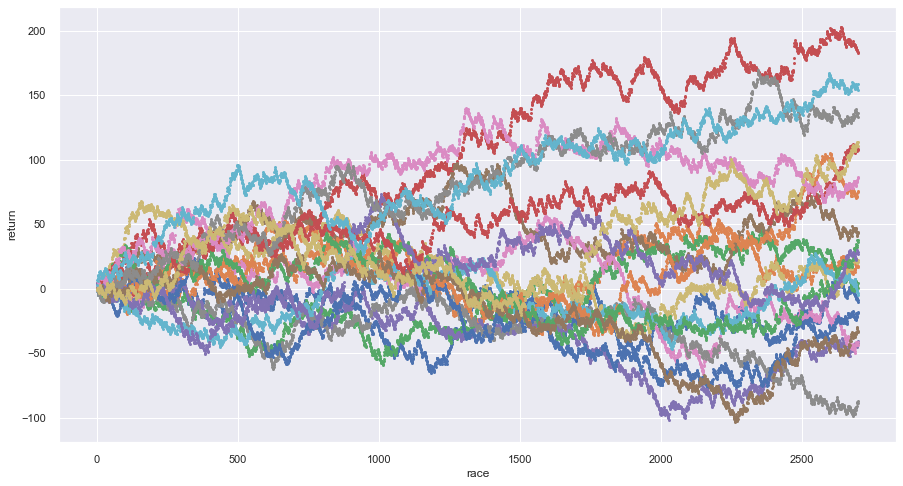

In [126]:
batch_list = range(0,int(len(market_list)))

fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)

ax.plot(batch_list, np.cumsum(monte_fav_list[0]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[1]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[2]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[3]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[4]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[5]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[6]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[7]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[8]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[9]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[10]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[11]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[12]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[13]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[14]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[15]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[16]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[17]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[18]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[19]),   '.')


plt.rc('font', size=28)
plt.xlabel("race")
plt.ylabel("return")
#_ = plt.plot([0, len(batch_list)], [1, 1])

#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

46.67829999999999
77.02576778007474


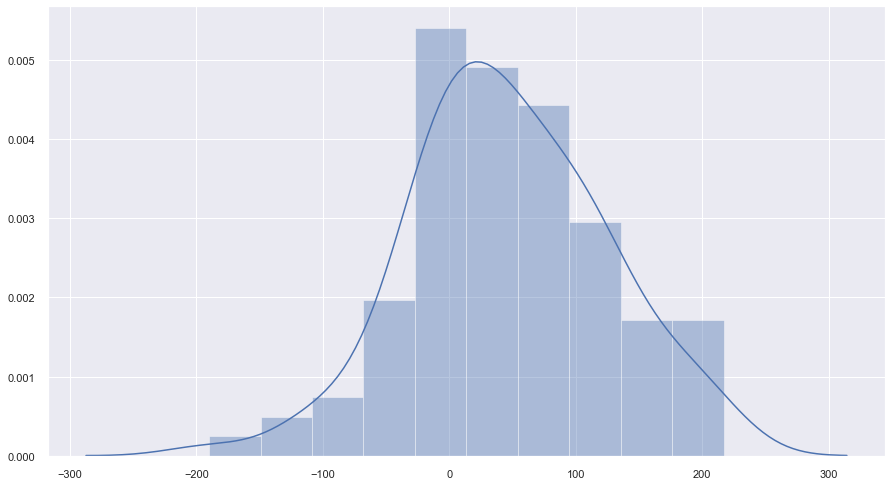

In [129]:
asd = []
for i in range(100):
    
    asd.append(np.cumsum(monte_fav_list[i])[-1])

print (np.mean(asd))
print (np.std(asd))

sns.distplot(asd)

# bet on long shot

In [256]:
longshot_list = []

for i in range(len(market_list)):
    
    reward = ((df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE'], ascending = False).BACKPRICE.iloc[0]-1) *\
               df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE'], ascending = False).WINNER.iloc[0]) -\
              (df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE'], ascending = False).LOSER.iloc[0])

    longshot_list.append(reward)

print (np.mean(longshot_list))
print (np.std(longshot_list))

0.09780041487627798
13.896554798901766


In [139]:
market_list = df1.groupby('MARKETID').RUNNER_NAME.count().index.tolist()
batch_list = range(0,len(market_list))

monte_longshot_list = []
for j in range(20):
    market_list = df1.groupby('MARKETID').RUNNER_NAME.count().index.tolist()
    market_list = random.sample(market_list, int(len(market_list)/5))
    
    longshot_list = []

    for i in range(len(market_list)):

        reward = ((df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE'], ascending = False).BACKPRICE.iloc[0]-1) *\
                   df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE'], ascending = False).WINNER.iloc[0]) -\
                  (df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE'], ascending = False).LOSER.iloc[0])

        longshot_list.append(reward)

    monte_longshot_list.append(longshot_list)

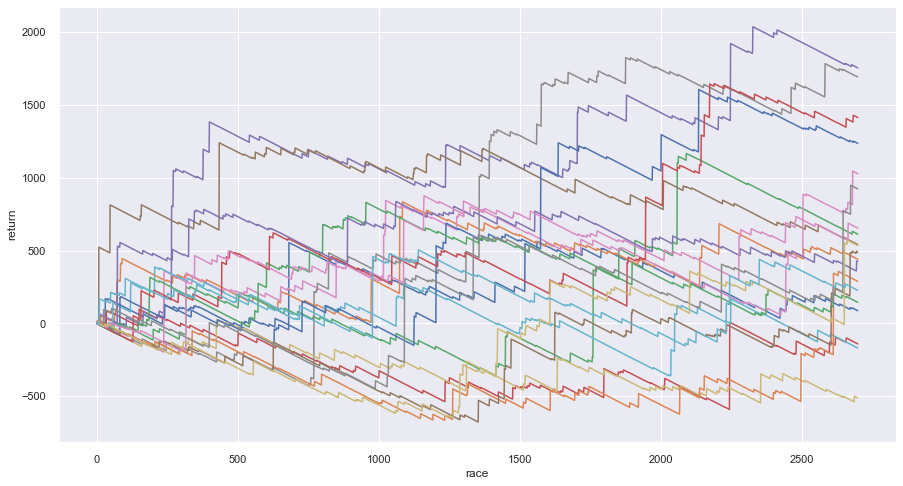

In [140]:
batch_list = range(0,int(len(market_list)))

fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)

ax.plot(batch_list, np.cumsum(monte_longshot_list[0]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[1]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[2]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[3]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[4]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[5]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[6]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[7]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[8]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[9]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[10]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[11]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[12]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[13]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[14]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[15]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[16]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[17]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[18]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[19]),   '-')

plt.rc('font', size=28)
plt.xlabel("race")
plt.ylabel("return")
#_ = plt.plot([0, len(batch_list)], [1, 1])

#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

290.74750000000006
453.2168573197051


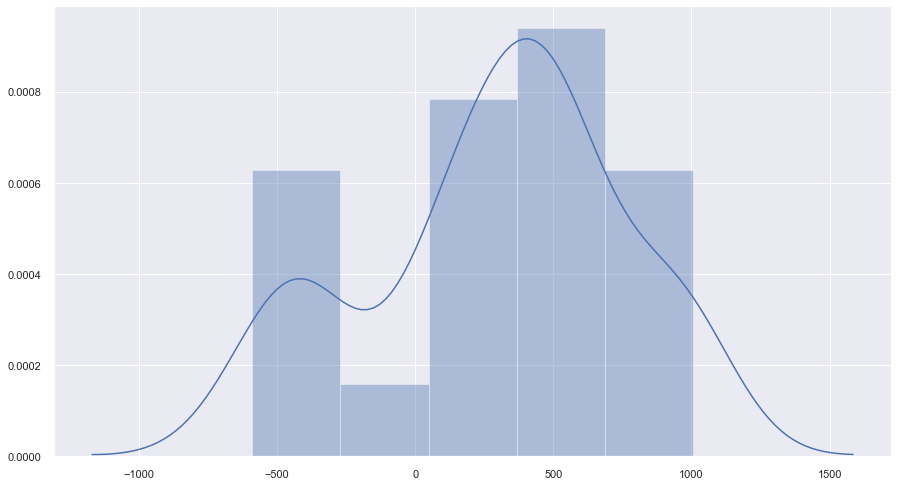

In [132]:
asd = []
for i in range(20):
    
    asd.append(np.cumsum(monte_longshot_list[i])[-1])

print (np.mean(asd))
print (np.std(asd))

sns.distplot(asd)

## bins 3 and 4 and bet according to sqaure(1.5) function

In [289]:
bin_no = 3

top_bound = df[(df['binned_' + feat] == bin_list[bin_no])].TOTAL_MATCHED_ON_RUNNER.max()
nottom_bound = df[(df['binned_' + feat] == bin_list[bin_no])].TOTAL_MATCHED_ON_RUNNER.min()

reward_list = []

for i in range(len(market_list)):
    
    for j in range(len(df1[df1.MARKETID == market_list[i]])):
        
        if (nottom_bound < df1[df1.MARKETID == market_list[i]].TOTAL_MATCHED_ON_RUNNER.iloc[j] < top_bound) &\
        (df1.BACKPRICE.iloc[j] > (1.5/prob_list[bin_no])):
                
            wager = ((df1.iloc[j].BACKPRICE - (1.5/prob_list[bin_no])) * 1)**1.5
            
        else:
            wager = 0
    
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1) * wager

        else:
            reward = -wager


    reward_list.append(reward)

print (np.mean(reward_list))
print (np.std(reward_list))

-147.8548472003792
1728.2859953641357


(-1000, 1000)

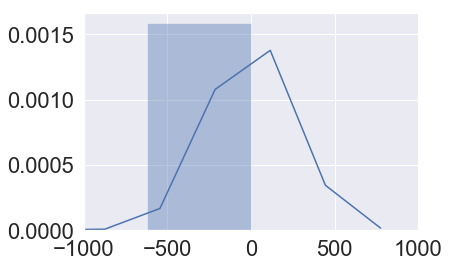

In [290]:
sns.distplot(reward_list)
plt.xlim(-1000,1000)

In [294]:
bin_no = 4

top_bound = df[(df['binned_' + feat] == bin_list[bin_no])].TOTAL_MATCHED_ON_RUNNER.max()
nottom_bound = df[(df['binned_' + feat] == bin_list[bin_no])].TOTAL_MATCHED_ON_RUNNER.min()

reward_list = []

for i in range(len(market_list)):
    
    for j in range(len(df1[df1.MARKETID == market_list[i]])):
        
        if (nottom_bound < df1[df1.MARKETID == market_list[i]].TOTAL_MATCHED_ON_RUNNER.iloc[j] < top_bound) &\
        (df1.BACKPRICE.iloc[j] > (1.5/prob_list[bin_no])):
                
            wager = ((df1.iloc[j].BACKPRICE - (1.5/prob_list[bin_no])) * 1)**1.5
            
        else:
            wager = 0
    
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1) * wager

        else:
            reward = -wager


    reward_list.append(reward)

print (np.mean(reward_list))
print (np.std(reward_list))

-69.71420769137386
1199.8060417361191


(-1000, 1000)

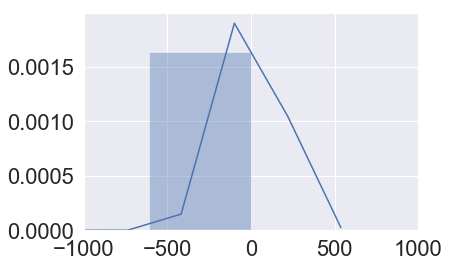

In [295]:
sns.distplot(reward_list)
plt.xlim(-1000,1000)

# PCA t SNE

In [8]:
df = pd.read_csv('HORSES_AIDAN.csv')

df = pd.concat([df,pd.get_dummies(df.HORSE_RESULT)], axis = 1)
df = pd.concat([df,pd.get_dummies(df.SEX_TYPE)], axis = 1)

cols = sorted(df.columns.tolist())

for p in cols:
    try:
        df[p].fillna(0.0,inplace=True)
    except:
        pass

C:\Users\ivan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (546) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
cols = ['ADJUSTED_RATING', 'AGE', 'AMT_BACKED_10_MINS_OUT', 'AMT_BACKED_1_MIN_OUT', 'AMT_BACKED_20_MINS_OUT',
 'AMT_BACKED_2_SECS_OUT', 'AMT_BACKED_30_MINS_OUT', 'AMT_BACKED_40_MINS_OUT', 'AMT_BACKED_45_MINS_OUT',
 'AMT_BACKED_5_MINS_OUT', 'AMT_BACKED_60_MINS_OUT', 'BACKPRICE', 'DAYS_SINCE_LAST_RUN', 'EXPERIENCE', 'EXPERIENCE_RANKING',
 'FORECASTPRICE_DENOMINATOR', 'FORECASTPRICE_NUMERATOR', 'HANDICAP', 'HORSE_RANKING_BY_PRICE',
 'LASTPRICETRADED', 'NUMBEROFACTIVERUNNERS', 'NUMBEROFRUNNERS', 'OFFICIAL_RATING', 'OFFICIAL_RATING_RANKING',
 'PMS_RANKING', 'PRICE_10_MINS_OUT', 'PRICE_10_MINS_OUT_RANKING',
 'PRICE_1_MIN_OUT', 'PRICE_1_MIN_OUT_RANKING', 'PRICE_20_MINS_OUT', 'PRICE_20_MINS_OUT_RANKING', 'PRICE_2_SECS_OUT',
 'PRICE_2_SECS_OUT_RANKING', 'PRICE_30_MINS_OUT', 'PRICE_30_MINS_OUT_RANKING', 'PRICE_40_MINS_OUT', 'PRICE_40_MINS_OUT_RANKING',
 'PRICE_45_MINS_OUT', 'PRICE_45_MINS_OUT_RANKING', 'PRICE_5_MINS_OUT', 'PRICE_5_MINS_OUT_RANKING', 'PRICE_60_MINS_OUT',
 'PRICE_60_MINS_OUT_RANKING', 'PRICE_MOVEMENT_SIGNIFICANCE', 'PRICE_RANKING_AT_RACE_START', 'PRODUCT_OF_ALL_RANKINGS',
 'PROD_OF_ALL_RANKINGS_RANKING', 'PROD_OF_NUM_SAMPLES_RANKINGS', 'PROD_SAMPLES_RANKINGS_RANKING', 'PROPENSITY',
 'PROPENSITY_RANKING', 'RACE_DISTANCE', 'SCORE_OF_RANKINGS', 'SCORE_OF_RANKINGS_RANKING',
 'SORT_PRIORITY', 'STALL_DRAW', 'SUM_OF_ALL_RANKINGS', 'SUM_OF_ALL_RANKINGS_RANKING',
 'SUM_OF_NUM_SAMPLES_RANKINGS', 'SUM_SAMPLES_RANKINGS_RANKING', 'TOTALAVAILABLE', 'TOTAL_MATCHED_ON_RACE',
 'TOTAL_MATCHED_ON_RUNNER', 'TOTAL_WLR', 'WEIGHT_VALUE',
 'WLR_RANKING', 'WLR_RANKINGS_RANKING', 'WLR_RANKINGS_TOTAL', 'C', 'F', 'G', 'H', 'M', 'R']

In [10]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
#Explained variation per principal component: [0.09746116 0.07155445 0.06149531]

Explained variation per principal component: [1.00000000e+00 6.70839599e-56 5.07967823e-59]


In [12]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

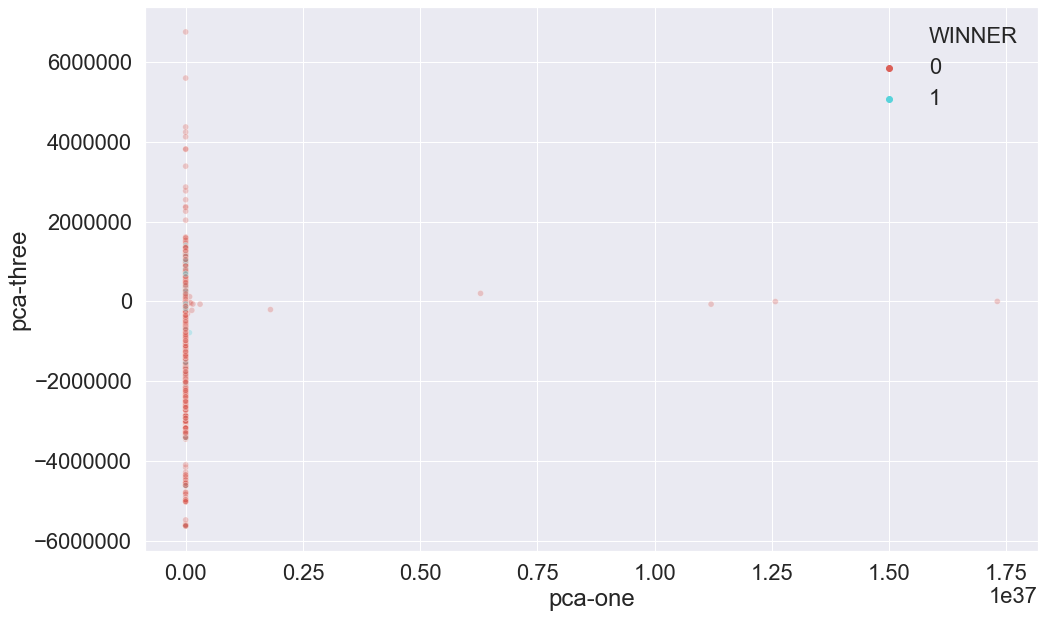

In [17]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-three",
    hue="WINNER",
    palette=sns.color_palette("hls", 2),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

In [19]:
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [1.00000000e+00 1.56975201e-56 8.01224224e-60]


In [20]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.116s...
[t-SNE] Computed neighbors for 10000 samples in 7.669s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 15034.140880
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.491669
[t-SNE] KL divergence after 300 iterations: 2.442680
t-SNE done! Time elap

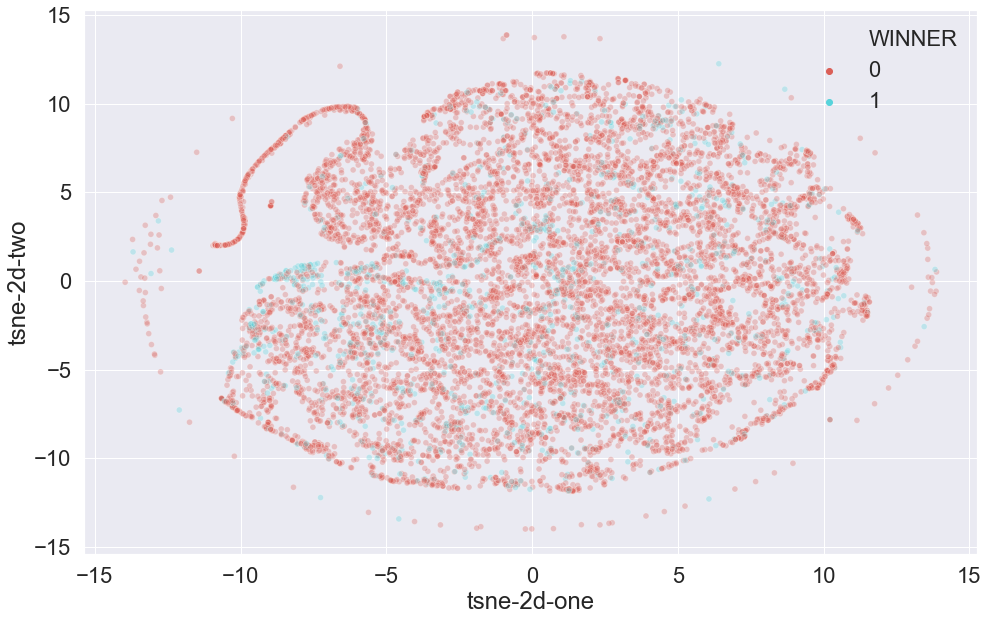

In [21]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="WINNER",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3
)

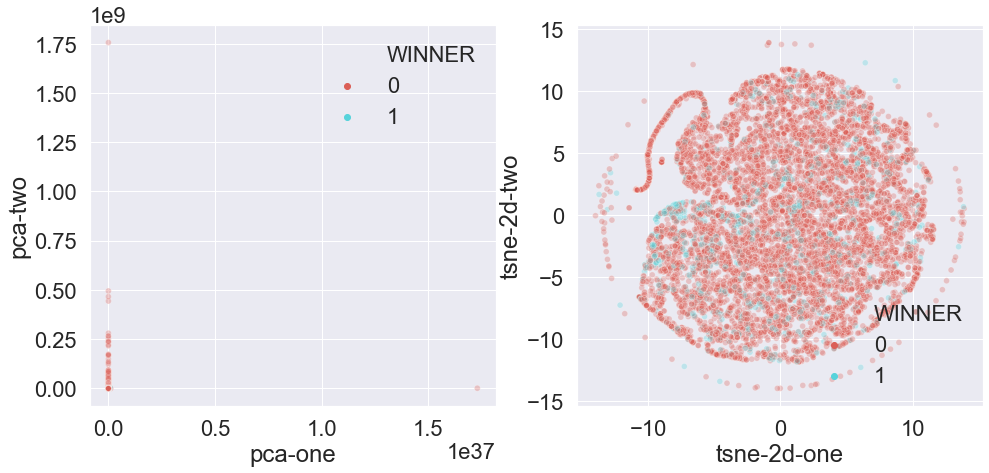

In [22]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="WINNER",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="WINNER",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [23]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.9999999999999981


In [24]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 122.78690791130066 seconds


In [ ]:
df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca50-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(16,4))
ax1 = plt.subplot(1, 3, 1)

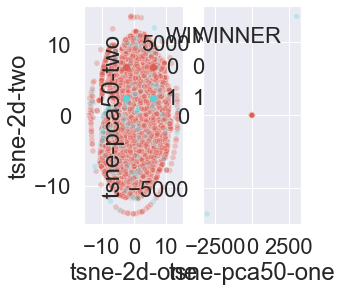

In [26]:
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="WINNER",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="WINNER",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="WINNER",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax3
)

In [ ]:
#def win_prob(binned, price):
#    return prob_list[bin_list.index(binned)]

#df['batch_prob'] = df.apply(lambda row: win_prob(row['binned'],row['BACKPRICE']), axis=1)

In [ ]:
prob_MOD_list = list(df.groupby('binned_' + feat).WINNER_MOD.sum()/bin_size)
bin_MOD_list = list(df.groupby('binned_' + feat).WINNER_MOD.sum().index)

## calculated as the change per euro to your a/c balance. 0 = no change to a/c.
### +(-) X means you gain(lose) X€ for every 1€ wagered

def EV_calc(binned, price):
    EV = prob_MOD_list[bin_MOD_list.index(binned)] * price
    return EV

df['EV_' + feat] = df.apply(lambda row: EV_calc(row['binned_' + feat],row['BACKPRICE']), axis=1)

mean_EV_list = list(df.groupby('binned_' + feat)['EV_' + feat].mean())

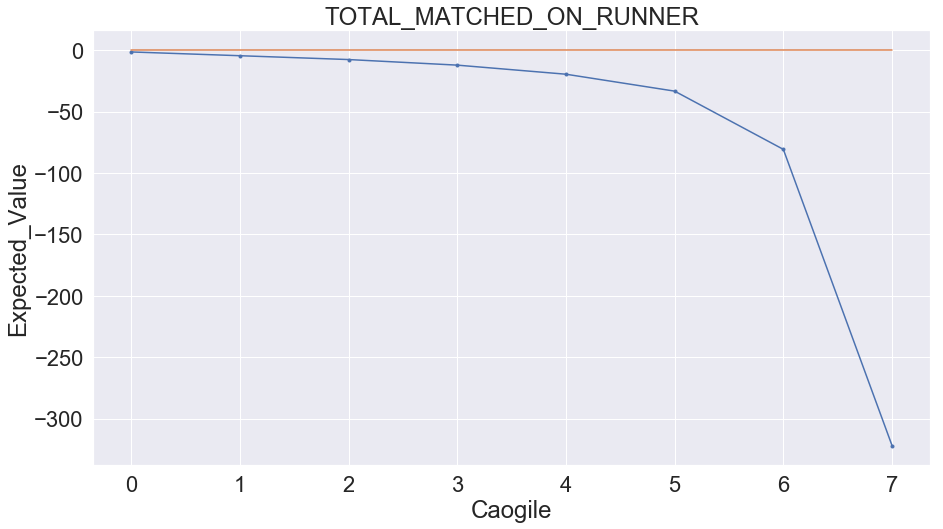

In [136]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, mean_EV_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Expected_Value")
_ = plt.plot([0, len(batch_list)-1], [0, 0])
plt.title(feat)

#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()